# **Conser-vision Practice Area**: Image Classification

https://www.drivendata.org/competitions/87/competition-image-classification-wildlife-conservation/page/483/

## Descripción del problema o reto:

El **objetivo** de este proyecto es clasificar las especies que aparecen en las imágenes capturadas por cámaras trampa, recopiladas por la Fundación Chimpancé Salvaje y el Instituto Max Planck de Antropología Evolutiva. Las cámaras trampa son herramientas fundamentales para el estudio y monitoreo de las poblaciones de vida silvestre. Estas cámaras proporcionan grandes cantidades de datos que, una vez procesados, pueden ser utilizados para rastrear diferentes especies en los esfuerzos de conservación.

Las cámaras trampa se encuentran ubicadas en diversos sitios alrededor del [Parque Nacional de Taï](http://www.ecotourismetai.com/). En este conjunto de imágenes, se encuentran siete tipos de animales. Además, existen imágenes que no contienen animales. La tarea consiste en construir un modelo capaz de ayudar a los investigadores a predecir si una imagen contiene alguno de estos siete tipos de especies.

### Conjunto de datos

Cada registro en el conjunto de datos corresponde a una única imagen capturada por una cámara trampa. Cada registro tiene un archivo asociado en el directorio, dependiendo del conjunto de datos al que pertenezca. Cada imagen viene acompañada de información adicional en los campos siguientes:

- `id` (cadena, identificador único): un identificador único para cada imagen.

- `filepath` (cadena, característica): ruta de la imagen, incluyendo la división en directorios (entrenamiento o prueba).

- `site` (cadena, característica): el sitio donde se tomó la imagen.

No hay superposición entre los sitios de los datos de entrenamiento y los datos de prueba, lo que significa que el modelo que se construya debe funcionar correctamente en nuevos contextos. Puede utilizar esta característica para crear su propio conjunto de entrenamiento y prueba, con sitios separados, para asegurarse de que su modelo pueda realizar buenas predicciones en sitios en los que no ha sido entrenado.

**Nota**: Los datos externos no proporcionados a través del desafío no están permitidos para su uso en esta competencia. Sin embargo, los participantes pueden usar modelos de visión por computadora previamente entrenados siempre que estén disponibles públicamente de forma gratuita y abierta sin ningún uso de los datos del desafío.

### Ejemplo de datos de características

Aquí hay un ejemplo de una sola imagen del conjunto de datos, que captura a un mono: `ZJ000048`

![ZJ000048](https://drivendata-public-assets.s3.amazonaws.com/zjff-ZJ000048.jpg)

Aquí están los metadatos asociados para esta imagen en: `train_features.csv`

|            | |  | |                            |
|:----------:|-|--|-|----------------------------|
|**id**      | |\|| |ZJ000048                    |
|**filepath**| |\|| |train_features/ZJ000048.jpg |
|**site**    | |\|| |S0025                       |

### [Sugerencias](https://www.drivendata.org/competitions/87/competition-image-classification-wildlife-conservation/page/483/#tips-for-working-with-images-as-features) para trabajar con imágenes como características

#### GENERALIZAR A NUEVOS SITIOS

Como se señaló anteriormente, un modelo puede aprender erróneamente a predecir una clase de especie basada en las características del medio ambiente, en lugar de las características de la especie en sí.

Para asegurarnos de que nuestros modelos predicen bien en nuevos contextos, es importante que los conjuntos de entrenamiento y prueba tengan entornos completamente diferentes. En este caso, aseguramos esto asegurándonos de que `site` estén completamente en el conjunto del tren o en el conjunto de prueba, pero nunca en ambos. Le recomendamos que adopte un enfoque similar al configurar sus propias divisiones del conjunto de entrenamiento.

#### [TRANSFORMACIONES DE IMAGEN](https://www.drivendata.org/competitions/87/competition-image-classification-wildlife-conservation/page/483/#image-transformations)

Además, hay muchas diferencias a tener en cuenta para las imágenes tomadas incluso dentro del mismo sitio. Por ejemplo, considere estas diferentes imágenes

|||||
|-|-|-|-|
|![ZJ000102](https://drivendata-public-assets.s3.amazonaws.com/zjff-ZJ000102.jpg)|![ZJ000090](https://drivendata-public-assets.s3.amazonaws.com/zjff-ZJ000090.jpg)| ![ZJ000097](https://drivendata-public-assets.s3.amazonaws.com/zjff-ZJ000097.jpg)|![ZJ000253](https://drivendata-public-assets.s3.amazonaws.com/zjff-ZJ000253.jpg)|

Como puede ver, hay diferencias significativas en nuestras imágenes de leopardos. Los animales pueden estar cerca o lejos de la cámara, al sol o en las sombras, o mirando hacia o lejos de la lente, entre otras variaciones. También hay diferencias en el color de la imagen, las condiciones climáticas en las que se tomó y el tipo de cámara.

Para enseñar al modelo que estas imágenes son todas de leopardos a pesar de estas diferencias, puede ser útil realizar un paso de preprocesamiento llamado `image augmentation`. El `image augmentation` implica transformar el conjunto de entrenamiento de múltiples maneras: girar, distorsionar el color o la nitidez, acercar o alejar el zoom son algunos ejemplos. Estas manipulaciones de la imagen pueden ayudar al modelo a hacer predicciones correctas en contextos a los que no ha estado expuesto antes.

#### Etiquetas

Hay ocho etiquetas posibles para cada imagen. Si la imagen no contiene ningún animal, se etiqueta como `blank`. De lo contrario, debe etiquetarse como que contiene uno de los siete grupos de especies incluidos en nuestro conjunto de datos:

1. `antelope_duiker`
2. `bird`
3. `civet_genet`
4. `hog`
5. `leopard`
6. `monkey_prosimian`
7. `rodent`

Cada imagen esta asociada a una clase, ya que cada imagen contiene como máximo un animal. (El Parque Nacional de Taï han elegido solo aquellas imágenes que capturan una sola clase de especie). Por lo tanto, el archivo `train_labels.csv` tiene una sola fila por imagen, que contiene los siguientes valores:

- `id` (cadena, identificador): el identificador único correspondiente a la imagen

- `antelope_duiker`, `bird`, `blank`, `civet_genet`, `hog`, `leopard`, `monkey_prosimian`, `rodent` (flotante, variables de destino): una columna para cada una de las posibles clases predichas que indica si la imagen es de esa clase (1) o no (0). Cada fila sumará 1, ya que las clases son mutuamente excluyentes (no hay imágenes en este conjunto de datos que tengan más de una clase de especie)


#### Presentación y evaluación

Para este desafío, se enviará la probabilidad de que una imagen pertenezca a cada una de las ocho clases posibles para cada imagen en `test_features`. Su rendimiento se basará en la forma correcta en que pueda identificar los animales y los espacios en blanco en estas imágenes.

#### Formato de envío

El formato de envío contiene nueve columnas:

- `id` (cadena): identificador único para cada fila de test_features.csv

- `antelope_duiker`, `bird`, `blank`, `civet_genet`, `hog`, `leopard`, `monkey_prosimian`, `rodent` (flotante, variables de destino): hay una columna para cada una de las ocho clases posibles que contiene la probabilidad de que la imagen sea de esa clase.

Las predicciones para las variables objetivo deben ser **probabilidades flotantes** que oscilen entre 0.0 y 1.0. Cada fila debe sumar 1, ya que las clases son mutuamente excluyentes. En `submission_format.csv`, las columnas de destino se rellenan actualmente con una probabilidad de marcador de posición aleatoria. Para crear un envío, sobrescriba estas ocho columnas con sus predicciones para las clases respectivas. Su presentación final debe parecerse en forma `train_labels.csv`, pero será para la `id` en `test_features.csv`.

#### Métrica de rendimiento

Para medir la precisión se usará una métrica llamada pérdida de registro o **log loss**. Esta es una métrica de error, por lo que un valor más bajo es mejor (a diferencia de una métrica de precisión, donde un valor más alto es mejor). Se puede calcular de la siguiente manera:

$$ loss = -\frac{1}{N}\cdot\sum\limits_{i=1}^{N}\sum\limits_{j=1}^{M} y_{ij}\log p_{ij} $$

Dónde $N$ es el número de observaciones, $M$ es el número de clases (en términos de nuestro problema $M = 5$), $y_{ij}$ es una variable binaria que indica si la clasificación para la observación $i$ era correcto, y $p_{ij}$ fue la probabilidad predicha por el usuario de que la etiqueta $j$ se aplica a la observación $i$.

En Python se puede calcular fácilmente la pérdida de registro utilizando la función `sklearn.metrics.log_lossMultiLogLoss`.

## Importación de Datos

In [ ]:
# Desactivar los warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Instalación de la librería tensorflow.js

!pip install tensorflowjs -q

In [ ]:
# Importación de librerías

import cv2                                                    # Librería para trabajar con imágenes
import glob                                                   # Librería para trabajar con rutas de archivos
import matplotlib.pyplot as plt                               # Librería para trazar gráficos
import numpy as np                                            # Librería para operaciones numéricas eficientes
import pandas as pd                                           # Librería para manipulación y análisis de datos
import seaborn as sns                                         # Librería para visualización de datos estadísticos
import shutil                                                 # Librería para copiar y manipular archivos y directorios
from concurrent.futures import ThreadPoolExecutor             # Librería para ejecución en paralelo
from google.colab import drive                                # Librería para interactuar con Google Drive
from google.colab import files                                # Librería para interactuar con archivos en Google Colab
from keras import layers, models, optimizers                  # Librería para redes neuronales con Keras
from keras.applications import InceptionV3                    # Librería para la arquitectura InceptionV3
from keras.preprocessing.image import ImageDataGenerator      # Librería para generación de imágenes en Keras
from keras.utils import to_categorical                        # Librería para conversión de etiquetas a categóricas
from progressbar import progressbar                           # Librería para mostrar una barra de progreso
from scipy.cluster import hierarchy                           # Librería para análisis de clusters en jerarquía
from sklearn.metrics import classification_report             # Librería para reporte de clasificación
from sklearn.model_selection import train_test_split          # Librería para dividir datos en entrenamiento y prueba

In [ ]:
# Importación de los datos

github = 'https://raw.githubusercontent.com/hectorOliSan/'                  # Ruta al repositorio en GitHub
repo = 'Proyecto_Final_IABD/main/Conser-vision%20Image%20Classification/'   # Nombre del repositorio

# Lectura de los datos de entrenamiento
df_train = pd.read_csv(github + repo + 'train_features.csv')
df_labels = pd.read_csv(github + repo + 'train_labels.csv')

# Lectura de los datos de prueba
df_test = pd.read_csv(github + repo + 'test_features.csv')

# Lectura del formato de presentación de resultados
df_format = pd.read_csv(github + repo + 'submission_format.csv')

In [ ]:
# Montar el Google Drive en Colab

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Esto permite acceder a los archivos del `Drive` desde `Colab`

In [ ]:
# Ruta de las imágenes de los datos

PATH = '/content/drive/MyDrive/Colab Notebooks/Proyecto Final/Conser-vision Image Classification'

Si no se trabaja en `Colab`, es necesario reemplazar los paths por las rutas de los archivos donde se encuentren almacenados los datos

### Dataframe train features

In [ ]:
# Dataframe de train inicial a utilizar

df_train

id                     filepath   site
0      ZJ000000  train_features/ZJ000000.jpg  S0120
1      ZJ000001  train_features/ZJ000001.jpg  S0069
2      ZJ000002  train_features/ZJ000002.jpg  S0009
3      ZJ000003  train_features/ZJ000003.jpg  S0008
4      ZJ000004  train_features/ZJ000004.jpg  S0036
...         ...                          ...    ...
16483  ZJ016483  train_features/ZJ016483.jpg  S0093
16484  ZJ016484  train_features/ZJ016484.jpg  S0043
16485  ZJ016485  train_features/ZJ016485.jpg  S0089
16486  ZJ016486  train_features/ZJ016486.jpg  S0095
16487  ZJ016487  train_features/ZJ016487.jpg  S0021

[16488 rows x 3 columns]

In [ ]:
# Dimensiones del Dataframe de train

df_train.shape

(16488, 3)

Es útil para verificar el tamaño del conjunto de datos antes de realizar operaciones o manipulaciones en él.

In [ ]:
# Nombres de las columnas del Dataframe train

df_train.columns

Index(['id', 'filepath', 'site'], dtype='object')

Esta información puede ser útil cuando se desea realizar operaciones en una o más columnas específicas en el DataFrame.

In [ ]:
# Información resumida sobre el Dataframe train

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16488 non-null  object
 1   filepath  16488 non-null  object
 2   site      16488 non-null  object
dtypes: object(3)
memory usage: 386.6+ KB


Esta información es útil para entender mejor el contenido y la estructura de un DataFrame, especialmente si se está trabajando con un dataset grande o complejo.

### Dataframe train labels

In [ ]:
# Dataframe de labels inicial a utilizar

df_labels

id  antelope_duiker  bird  blank  civet_genet  hog  leopard  \
0      ZJ000000              0.0   1.0    0.0          0.0  0.0      0.0   
1      ZJ000001              0.0   0.0    0.0          0.0  0.0      0.0   
2      ZJ000002              0.0   1.0    0.0          0.0  0.0      0.0   
3      ZJ000003              0.0   0.0    0.0          0.0  0.0      0.0   
4      ZJ000004              0.0   0.0    0.0          0.0  0.0      1.0   
...         ...              ...   ...    ...          ...  ...      ...   
16483  ZJ016483              0.0   0.0    1.0          0.0  0.0      0.0   
16484  ZJ016484              0.0   0.0    0.0          0.0  0.0      1.0   
16485  ZJ016485              0.0   0.0    0.0          1.0  0.0      0.0   
16486  ZJ016486              0.0   1.0    0.0          0.0  0.0      0.0   
16487  ZJ016487              0.0   0.0    0.0          1.0  0.0      0.0   

       monkey_prosimian  rodent  
0                   0.0     0.0  
1                   1.0     0.0  
2                   0.0     0.0  
3                   1.0     0.0  
4                   0.0     0.0  
...                 ...     ...  
16483               0.0     0.0  
16484               0.0     0.0  
16485               0.0     0.0  
16486               0.0     0.0  
16487               0.0     0.0  

[16488 rows x 9 columns]

In [ ]:
# Dimensiones del Dataframe de labels

df_labels.shape

(16488, 9)

In [ ]:
# Nombres de las columnas del Dataframe labels

df_labels.columns

Index(['id', 'antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog',
       'leopard', 'monkey_prosimian', 'rodent'],
      dtype='object')

In [ ]:
# Información resumida sobre el Dataframe labels

df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16488 non-null  object 
 1   antelope_duiker   16488 non-null  float64
 2   bird              16488 non-null  float64
 3   blank             16488 non-null  float64
 4   civet_genet       16488 non-null  float64
 5   hog               16488 non-null  float64
 6   leopard           16488 non-null  float64
 7   monkey_prosimian  16488 non-null  float64
 8   rodent            16488 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


### Dataframe test

In [ ]:
# Dataframe de tes inicial a utilizar

df_test

id                    filepath   site
0     ZJ016488  test_features/ZJ016488.jpg  S0082
1     ZJ016489  test_features/ZJ016489.jpg  S0040
2     ZJ016490  test_features/ZJ016490.jpg  S0040
3     ZJ016491  test_features/ZJ016491.jpg  S0041
4     ZJ016492  test_features/ZJ016492.jpg  S0040
...        ...                         ...    ...
4459  ZJ020947  test_features/ZJ020947.jpg  S0086
4460  ZJ020948  test_features/ZJ020948.jpg  S0152
4461  ZJ020949  test_features/ZJ020949.jpg  S0162
4462  ZJ020950  test_features/ZJ020950.jpg  S0055
4463  ZJ020951  test_features/ZJ020951.jpg  S0114

[4464 rows x 3 columns]

In [ ]:
# Dimensiones del Dataframe de test

df_test.shape

(4464, 3)

In [ ]:
# Nombres de las columnas del Dataframe test

df_test.columns

Index(['id', 'filepath', 'site'], dtype='object')

In [ ]:
# Información resumida sobre el Dataframe test

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4464 non-null   object
 1   filepath  4464 non-null   object
 2   site      4464 non-null   object
dtypes: object(3)
memory usage: 104.8+ KB


### Dataframe submission format

In [ ]:
# Dataframe de format inicial a utilizar

df_format

id  antelope_duiker      bird     blank  civet_genet       hog  \
0     ZJ016488         0.048233  0.189185  0.044914     0.199588  0.106118   
1     ZJ016489         0.097078  0.061400  0.026409     0.241530  0.144344   
2     ZJ016490         0.124658  0.089101  0.189225     0.174494  0.180540   
3     ZJ016491         0.109966  0.048397  0.055598     0.323600  0.322356   
4     ZJ016492         0.165742  0.184610  0.005431     0.136806  0.000389   
...        ...              ...       ...       ...          ...       ...   
4459  ZJ020947         0.143675  0.185103  0.109074     0.158833  0.083497   
4460  ZJ020948         0.068913  0.150572  0.197232     0.124579  0.131486   
4461  ZJ020949         0.098239  0.149066  0.168635     0.086321  0.136863   
4462  ZJ020950         0.036345  0.115411  0.302392     0.072757  0.105491   
4463  ZJ020951         0.118298  0.093348  0.088412     0.110691  0.129448   

       leopard  monkey_prosimian    rodent  
0     0.132915          0.166410  0.112637  
1     0.051780          0.287811  0.089648  
2     0.079995          0.085672  0.076314  
3     0.063252          0.008160  0.068671  
4     0.122078          0.151521  0.233423  
...        ...               ...       ...  
4459  0.010513          0.155293  0.154011  
4460  0.152534          0.039096  0.135588  
4461  0.077155          0.121480  0.162241  
4462  0.183422          0.106307  0.077875  
4463  0.009582          0.243225  0.206995  

[4464 rows x 9 columns]

In [ ]:
# Dimensiones del Dataframe de format

df_format.shape

(4464, 9)

In [ ]:
# Nombres de las columnas del Dataframe format

df_format.columns

Index(['id', 'antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog',
       'leopard', 'monkey_prosimian', 'rodent'],
      dtype='object')

In [ ]:
# Información resumida sobre el Dataframe format

df_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4464 non-null   object 
 1   antelope_duiker   4464 non-null   float64
 2   bird              4464 non-null   float64
 3   blank             4464 non-null   float64
 4   civet_genet       4464 non-null   float64
 5   hog               4464 non-null   float64
 6   leopard           4464 non-null   float64
 7   monkey_prosimian  4464 non-null   float64
 8   rodent            4464 non-null   float64
dtypes: float64(8), object(1)
memory usage: 314.0+ KB


## Exploración de los Datos

In [ ]:
# Obtención de las etiquetas únicas de las columnas

labels = sorted(df_labels.columns[1:].unique())
labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

Lista ordenada de las etiquetas, para poder ordenar las entradas y salidas del modelo de manera consistente.

In [ ]:
# Diccionario de Mapeo de número de clase a especies

num_species = {index: value for index, value in enumerate(labels)}
num_species

{0: 'antelope_duiker',
 1: 'bird',
 2: 'blank',
 3: 'civet_genet',
 4: 'hog',
 5: 'leopard',
 6: 'monkey_prosimian',
 7: 'rodent'}

Útil cuando se necesita asignar índices numéricos a las etiquetas de forma rápida y eficiente.

In [ ]:
# Diccionario inverso de especies a número de clase

species_num = {value: key for key, value in num_species.items()}
species_num

{'antelope_duiker': 0,
 'bird': 1,
 'blank': 2,
 'civet_genet': 3,
 'hog': 4,
 'leopard': 5,
 'monkey_prosimian': 6,
 'rodent': 7}

Útil cuando se necesita realizar búsquedas o consultas utilizando las etiquetas de especies como referencia y se desea obtener los índices numéricos asociados.

| | #                                                 | 7 Elapsed Time: 0:00:00


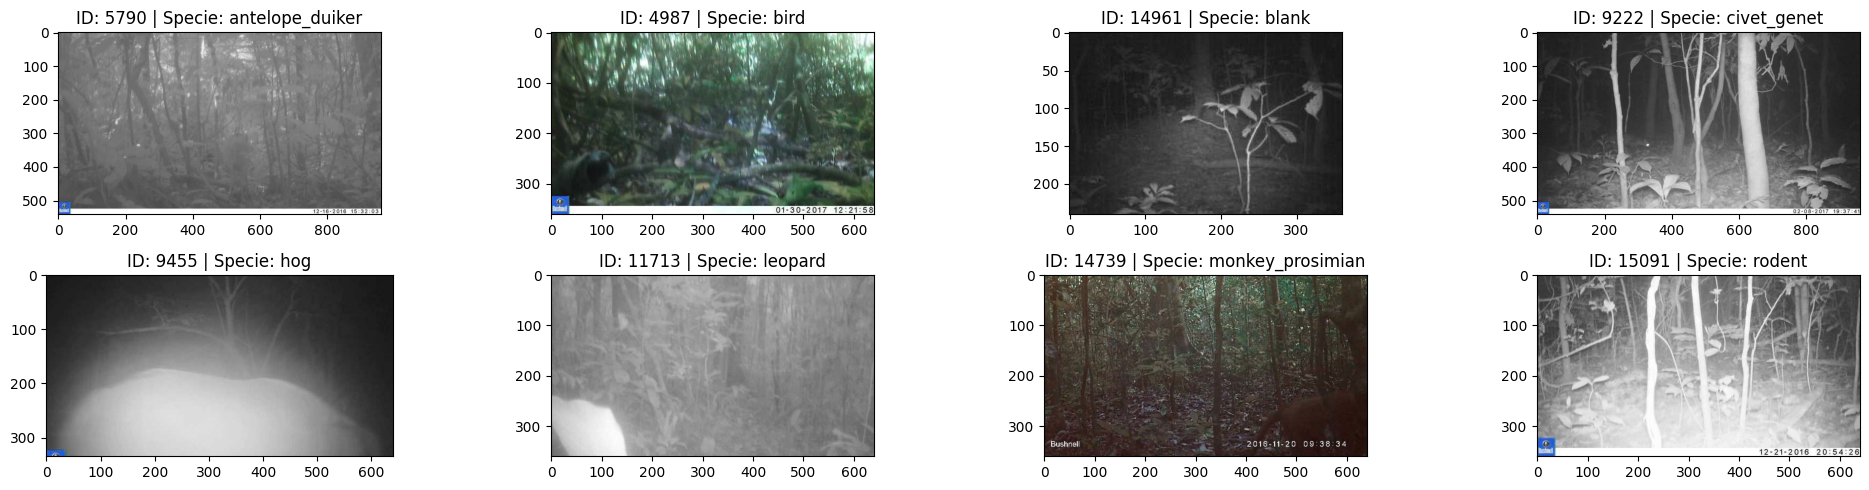

In [ ]:
# Creación de la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 5))

# Iteración sobre las etiquetas y los ejes correspondientes
for species, ax in progressbar(zip(labels, axes.flat)):

  # Selección aleatoria de una imagen de la especie actual
  img_id = np.random.choice(df_labels[df_labels[species] == 1].index)
  img = cv2.imread(PATH + '/' + df_train.loc[img_id, 'filepath'])           # Lectura y carga de la imagen
  ax.imshow(img)                                                            # Muestra la imagen en el eje actual
  ax.set_title(f"ID: {img_id} | Specie: {species}")                         # Establece el título del subplot

# Ajusta el diseño de los subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()

Selección de una sola imagen aleatoria de cada especie para mostrar, junto con su ID de imagen y etiqueta

In [ ]:
# Cálculo de la suma de las etiquetas, excluyendo la primera columna, y ordenando los valores en orden descendente

labels_sum = df_labels.sum().iloc[1:].sort_values(ascending=False)
labels_sum

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: object

Distribución de especies en el conjunto de entrenamiento

In [ ]:
# Cálculo de la proporción de etiquetas, excluyendo la primera columna, ordenando los valores en orden descendente

labels_ratio = df_labels.sum().iloc[1:].divide(df_labels.shape[0]).sort_values(ascending=False)
labels_ratio

monkey_prosimian     0.15114
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: object

Distribución de especies en el conjunto de entrenamiento, en términos porcentuales

## Prueba con los Datos:

Como prueba inicial, cargaré los datos de prueba que nos ofrecen, en la competición utilizando el archivo `submission_format.csv`, con el fin de evaluar los resultados obtenidos y determinar cómo puedo abordar el problema de manera más efectiva.

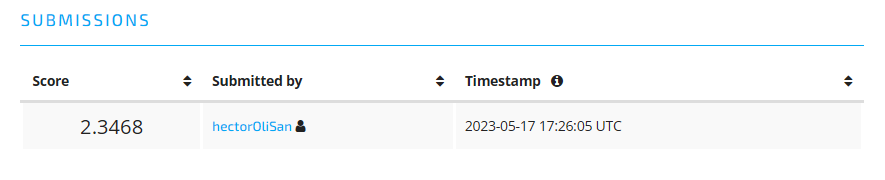

### Conclusión:

En base a los resultados obtenidos utilizando el `submission_format.csv` proporcionado por la competición de ejemplo, alcanzó una puntuación de **2.3468**. Comparativamente, la mejor puntuación del líder actual en la competición es de **0.7476**. 

Por lo tanto, será necesario explorar diferentes enfoques y técnicas para abordar el problema y buscar estrategias que permitan mejorar esta puntuación de ejemplo.

## Preparación y Edición de los Dataframes:

**Preparación de Datos**: La preparación de datos es una de las fases más importantes en cualquier proyecto de análisis de datos. Esta fase implica la recopilación, limpieza, transformación y selección de datos necesarios para su análisis.

Entre las tareas de preparación de datos se encuentran:

1. Limpieza de datos: se deben eliminar los datos duplicados, incompletos o inconsistentes del conjunto de datos.

2. Transformación de datos: se deben transformar los datos para que sean compatibles con el modelo que se va a utilizar. Por ejemplo, conversión de valores categóricos a numéricos, escalado o normalización los datos.

3. Selección de características: se deben seleccionar las características que mejor se ajusten al modelo.

Una vez realizado la preparación de los datos, se procedería a la fase de entrenamiento del modelo de predicción.

#### Transformación de los Datos para la visualización:

In [ ]:
# Unión de los DataFrames por la columna 'id'

df_total = pd.merge(df_train, df_labels, on='id', how='inner')
df_total.head()

id                     filepath   site  antelope_duiker  bird  blank  \
0  ZJ000000  train_features/ZJ000000.jpg  S0120              0.0   1.0    0.0   
1  ZJ000001  train_features/ZJ000001.jpg  S0069              0.0   0.0    0.0   
2  ZJ000002  train_features/ZJ000002.jpg  S0009              0.0   1.0    0.0   
3  ZJ000003  train_features/ZJ000003.jpg  S0008              0.0   0.0    0.0   
4  ZJ000004  train_features/ZJ000004.jpg  S0036              0.0   0.0    0.0   

   civet_genet  hog  leopard  monkey_prosimian  rodent  
0          0.0  0.0      0.0               0.0     0.0  
1          0.0  0.0      0.0               1.0     0.0  
2          0.0  0.0      0.0               0.0     0.0  
3          0.0  0.0      0.0               1.0     0.0  
4          0.0  0.0      1.0               0.0     0.0

In [ ]:
# Eliminación columna filepath
df_total = df_total.drop('filepath', axis=1)

# Conversión de 'id' a int
df_total['id'] = pd.to_numeric(df_total['id'].str.replace('ZJ', '')).astype('int64')

# Conversión de 'site' a int
df_total['site'] = pd.to_numeric(df_total['site'].str.replace('S', '')).astype('int64')

In [ ]:
# Dataframe total tras la eliminación y conversión

df_total.head()

id  site  antelope_duiker  bird  blank  civet_genet  hog  leopard  \
0   0   120              0.0   1.0    0.0          0.0  0.0      0.0   
1   1    69              0.0   0.0    0.0          0.0  0.0      0.0   
2   2     9              0.0   1.0    0.0          0.0  0.0      0.0   
3   3     8              0.0   0.0    0.0          0.0  0.0      0.0   
4   4    36              0.0   0.0    0.0          0.0  0.0      1.0   

   monkey_prosimian  rodent  
0               0.0     0.0  
1               1.0     0.0  
2               0.0     0.0  
3               1.0     0.0  
4               0.0     0.0

In [ ]:
# Añade la columna 'species' con la etiqueta correspondiente al valor 1.0 en cada fila

df_total['species'] = df_total[labels].idxmax(axis=1)

In [ ]:
# Dataframe total tras añadir la columna'species'

df_total.head()

id  site  antelope_duiker  bird  blank  civet_genet  hog  leopard  \
0   0   120              0.0   1.0    0.0          0.0  0.0      0.0   
1   1    69              0.0   0.0    0.0          0.0  0.0      0.0   
2   2     9              0.0   1.0    0.0          0.0  0.0      0.0   
3   3     8              0.0   0.0    0.0          0.0  0.0      0.0   
4   4    36              0.0   0.0    0.0          0.0  0.0      1.0   

   monkey_prosimian  rodent           species  
0               0.0     0.0              bird  
1               1.0     0.0  monkey_prosimian  
2               0.0     0.0              bird  
3               1.0     0.0  monkey_prosimian  
4               0.0     0.0           leopard

In [ ]:
# Conversión de la columna 'species' a valores numéricos utilizando el diccionario species_num

df_total['species'] = df_total['species'].replace(species_num)

In [ ]:
# Dataframe total tras la conversión

df_total.head()

id  site  antelope_duiker  bird  blank  civet_genet  hog  leopard  \
0   0   120              0.0   1.0    0.0          0.0  0.0      0.0   
1   1    69              0.0   0.0    0.0          0.0  0.0      0.0   
2   2     9              0.0   1.0    0.0          0.0  0.0      0.0   
3   3     8              0.0   0.0    0.0          0.0  0.0      0.0   
4   4    36              0.0   0.0    0.0          0.0  0.0      1.0   

   monkey_prosimian  rodent  species  
0               0.0     0.0        1  
1               1.0     0.0        6  
2               0.0     0.0        1  
3               1.0     0.0        6  
4               0.0     0.0        5

In [ ]:
# Dimensiones del Dataframe total

df_total.shape

(16488, 11)

In [ ]:
# Información resumida sobre el Dataframe total

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16488 entries, 0 to 16487
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16488 non-null  int64  
 1   site              16488 non-null  int64  
 2   antelope_duiker   16488 non-null  float64
 3   bird              16488 non-null  float64
 4   blank             16488 non-null  float64
 5   civet_genet       16488 non-null  float64
 6   hog               16488 non-null  float64
 7   leopard           16488 non-null  float64
 8   monkey_prosimian  16488 non-null  float64
 9   rodent            16488 non-null  float64
 10  species           16488 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


#### Transformación de los Datos para el entrenamiento:

In [ ]:
# Eliminación de las columnas no necesarias

df_train = df_train.drop(['id', 'site'], axis=1)
df_test = df_test.drop(['id', 'site'], axis=1)

df_labels = df_labels.drop('id', axis=1)

In [ ]:
# Añadimos todo el path a los Dataframe de train y test

df_train['filepath'] = PATH + '/' + df_train['filepath']
df_test['filepath'] = PATH + '/' + df_test['filepath']

In [ ]:
# Estandarizar todas las imágenes

IMG_SIZE = 75 # Tamaño de imagen deseado, se establece en 75

La elección del tamaño de imagen de 75 se basa en dos consideraciones principales:

- Primero, se estableció como el tamaño mínimo necesario para entrenar adecuadamente el modelo InceptionV3, que se verá más adelante. Cada tipo de red neuronal tiene unos requisitos específicos en cuanto al tamaño de entrada de los datos. En el caso de InceptionV3, se determinó experimentalmente que el tamaño mínimo necesario de las imagenes debe ser de 75x75.

- Además, el tamaño de imagen de 75 también se eligió teniendo en cuenta las limitaciones de memoria y rendimiento al ejecutar el código en Colab, ya que, al aumentar el tamaño de las imagenes a más de 100 se producía una interrupción en el proceso de ejecución.

El tamaño de imagen de 75 puede ser adecuado para entrenar el modelo en Colab, pero existe pérdida en la resolución, ya que como se puede observar más adelante, la imagen se pixela. Por lo que, se intentó encontrar un equilibrio entre los requisitos del modelo y las limitaciones del entorno de ejecución al seleccionar el tamaño de imagen.

In [ ]:
# Lista para almacenar los arrays de numpy
X = []
X_submit = []

In [ ]:
# Función para cargar y redimensionar una imagen
def load_and_resize_image(path):
  image = cv2.imread(path)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  return image

# Función para leer las imagenes de los datos
def leer_imagenes(lista, ruta):
  # Utiliza hilos para cargar y redimensionar imágenes en paralelo
  with ThreadPoolExecutor() as executor:

    # Iteración sobre las rutas de archivo con una barra de progreso
    for image in progressbar(executor.map(load_and_resize_image, ruta), total=len(ruta)):
      lista.append(image)

  print("Leídas {} imágenes".format(len(lista)))

leer_imagenes(X, df_train['filepath'])
leer_imagenes(X_submit, df_test['filepath'])

| |                              #                | 16487 Elapsed Time: 0:01:27


Leídas 16488 imágenes


| |#                                               | 4463 Elapsed Time: 0:00:19


Leídas 4464 imágenes


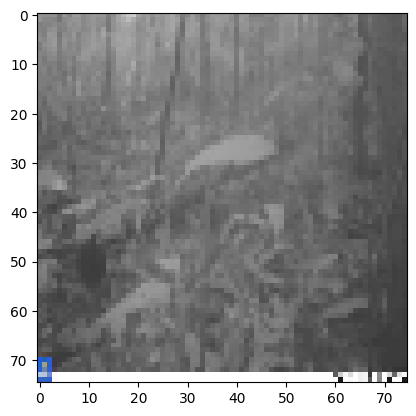

In [ ]:
# Muestra la primera imagen

plt.imshow(X[0])

In [ ]:
# Convertir las listas en NumPy arrays
X = np.array(X)
X_submit = np.array(X_submit)

# Normalización de los valores de píxeles de las imágenes
X = X / 255.0
X_submit = X_submit / 255.0

In [ ]:
# Valores de la primera imagen

X[0]

array([[[0.58039216, 0.58039216, 0.58039216],
        [0.56078431, 0.56078431, 0.56078431],
        [0.56078431, 0.56078431, 0.56078431],
        ...,
        [0.34509804, 0.34509804, 0.34509804],
        [0.35294118, 0.35294118, 0.35294118],
        [0.4       , 0.4       , 0.4       ]],

       [[0.57254902, 0.57254902, 0.57254902],
        [0.52941176, 0.52941176, 0.52941176],
        [0.52941176, 0.52941176, 0.52941176],
        ...,
        [0.34509804, 0.34509804, 0.34509804],
        [0.35294118, 0.35294118, 0.35294118],
        [0.40784314, 0.40784314, 0.40784314]],

       [[0.49803922, 0.49803922, 0.49803922],
        [0.51372549, 0.51372549, 0.51372549],
        [0.51372549, 0.51372549, 0.51372549],
        ...,
        [0.35294118, 0.35294118, 0.35294118],
        [0.35294118, 0.35294118, 0.35294118],
        [0.4       , 0.4       , 0.4       ]],

       ...,

       [[0.17254902, 0.36470588, 0.84705882],
        [0.42745098, 0.51372549, 0.6627451 ],
        [0.19215686, 0

Al dividir cada valor de píxel por 255.0, se escalan los valores de píxeles a un rango de 0 a 1. Esto es importante porque muchos algoritmos y modelos de aprendizaje automático funcionan mejor con valores de entrada que están en una escala similar. Además, la normalización ayuda a evitar que ciertos valores de píxeles dominen sobre otros durante el entrenamiento del modelo.

In [ ]:
# Dimensiones de X y X_submit:
# - La primera dimensión, número de imágenes en el conjunto de datos
# - La segunda y tercera dimensiónes (64,64), resolución en píxeles que tiene cada imagen
# - La cuarta dimensión (3), canales de color de las imágenes (RGB)

X.shape, X_submit.shape

((16488, 75, 75, 3), (4464, 75, 75, 3))

In [ ]:
# Valor numéricos utilizando el diccionario species_num
# de la etiqueta correspondiente al valor 1.0 en cada fila

y = df_labels[labels].idxmax(axis=1).replace(species_num)
y

0        1
1        6
2        1
3        6
4        5
        ..
16483    2
16484    5
16485    3
16486    1
16487    3
Length: 16488, dtype: int64

In [ ]:
# Dimensiones de y:
y.shape

(16488,)

In [ ]:
# Valores únicos de y

np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

## Visualización de Datos:

In [ ]:
# Estadísticas descriptivas del Dataframe total

df_total.describe().applymap('{:.2f}'.format)

id      site antelope_duiker      bird     blank civet_genet  \
count  16488.00  16488.00        16488.00  16488.00  16488.00    16488.00   
mean    8243.50     75.27            0.15      0.10      0.13        0.15   
std     4759.82     53.22            0.36      0.30      0.34        0.35   
min        0.00      1.00            0.00      0.00      0.00        0.00   
25%     4121.75     31.00            0.00      0.00      0.00        0.00   
50%     8243.50     62.00            0.00      0.00      0.00        0.00   
75%    12365.25    120.00            0.00      0.00      0.00        0.00   
max    16487.00    198.00            1.00      1.00      1.00        1.00   

            hog   leopard monkey_prosimian    rodent   species  
count  16488.00  16488.00         16488.00  16488.00  16488.00  
mean       0.06      0.14             0.15      0.12      3.49  
std        0.24      0.34             0.36      0.33      2.36  
min        0.00      0.00             0.00      0.00      0.00  
25%        0.00      0.00             0.00      0.00      2.00  
50%        0.00      0.00             0.00      0.00      3.00  
75%        0.00      0.00             0.00      0.00      6.00  
max        1.00      1.00             1.00      1.00      7.00

### Matriz de correlación

In [ ]:
# Matriz de correlación del Dataframe total

mc = df_total.corr()
mc

id      site  antelope_duiker      bird     blank  \
id                1.000000  0.003279         0.013737 -0.001226 -0.003478   
site              0.003279  1.000000         0.101842 -0.007741  0.136971   
antelope_duiker   0.013737  0.101842         1.000000 -0.139686 -0.165433   
bird             -0.001226 -0.007741        -0.139686  1.000000 -0.130899   
blank            -0.003478  0.136971        -0.165433 -0.130899  1.000000   
civet_genet       0.004791 -0.048229        -0.174392 -0.137988 -0.163422   
hog               0.006342 -0.015314        -0.105507 -0.083483 -0.098870   
leopard          -0.007225 -0.066910        -0.167198 -0.132297 -0.156681   
monkey_prosimian -0.001200 -0.058828        -0.177293 -0.140284 -0.166140   
rodent           -0.011106 -0.048851        -0.156686 -0.123979 -0.146830   
species          -0.013611 -0.139061        -0.621994 -0.351181 -0.248950   

                  civet_genet       hog   leopard  monkey_prosimian    rodent  \
id                   0.004791  0.006342 -0.007225         -0.001200 -0.011106   
site                -0.048229 -0.015314 -0.066910         -0.058828 -0.048851   
antelope_duiker     -0.174392 -0.105507 -0.167198         -0.177293 -0.156686   
bird                -0.137988 -0.083483 -0.132297         -0.140284 -0.123979   
blank               -0.163422 -0.098870 -0.156681         -0.166140 -0.146830   
civet_genet          1.000000 -0.104225 -0.165166         -0.175137 -0.154782   
hog                 -0.104225  1.000000 -0.099926         -0.105958 -0.093643   
leopard             -0.165166 -0.099926  1.000000         -0.167913 -0.148397   
monkey_prosimian    -0.175137 -0.105958 -0.167913          1.000000 -0.157356   
rodent              -0.154782 -0.093643 -0.148397         -0.157356  1.000000   
species             -0.086431  0.054190  0.254616          0.448916  0.554872   

                   species  
id               -0.013611  
site             -0.139061  
antelope_duiker  -0.621994  
bird             -0.351181  
blank            -0.248950  
civet_genet      -0.086431  
hog               0.054190  
leopard           0.254616  
monkey_prosimian  0.448916  
rodent            0.554872  
species           1.000000

La **matriz de correlación** es una herramienta utilizada para analizar la relación entre dos o más variables en un conjunto de datos. Es una tabla que muestra la correlación entre todas las posibles combinaciones de pares de variables. Las correlaciones pueden variar de -1 a 1, donde -1 indica una correlación negativa perfecta, 0 indica ausencia de correlación y 1 indica una correlación positiva perfecta.

La matriz de correlación es útil porque proporciona información sobre cómo las variables están relacionadas entre sí. Sin embargo, cuando se trabaja con un gran número de variables, puede ser difícil de interpretar visualmente. Por lo tanto, se utiliza un mapa de calor para visualizar la matriz de correlación.

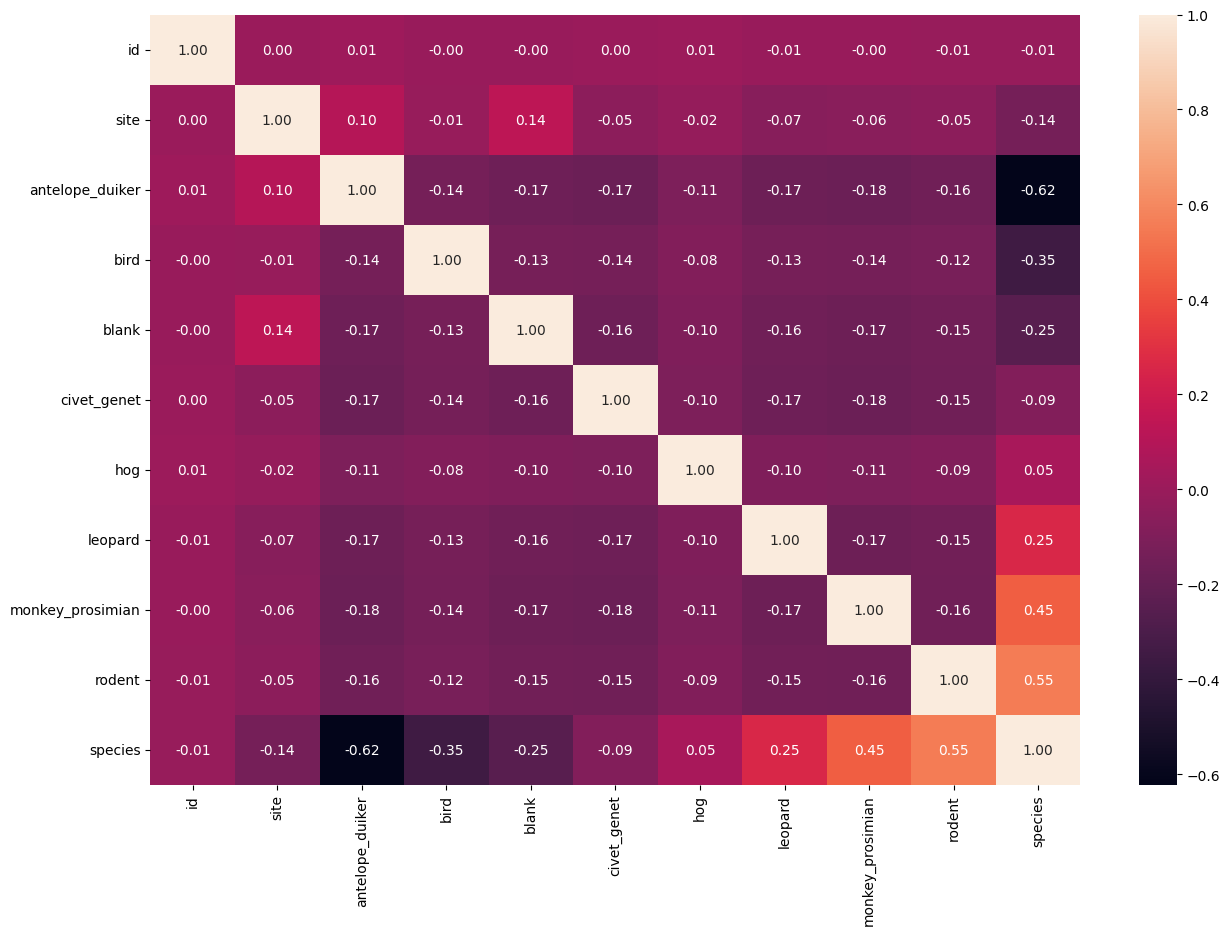

In [ ]:
# Matriz de correlación como un mapa de calor del Dataframe de total

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mc, annot=True, fmt=".2f")
plt.show()

El **mapa de calor** es una forma de visualizar los datos de la matriz de correlación utilizando colores. Los valores de correlación más altos se representan en un color más oscuro, mientras que los valores de correlación más bajos se representan en un color más claro. El mapa de calor es útil porque permite visualizar rápidamente las relaciones entre las variables y resaltar patrones que pueden ser difíciles de detectar en una tabla de números.

Además, el mapa de calor es una forma eficiente de identificar variables altamente correlacionadas, lo que puede ser útil en la selección de variables para el análisis o modelado. Si dos variables están altamente correlacionadas, es posible que solo se necesite una de ellas en el modelo para explicar la variabilidad de los datos. Esto puede ayudar a simplificar el modelo y reducir la complejidad.

Distancia Media: 64.00


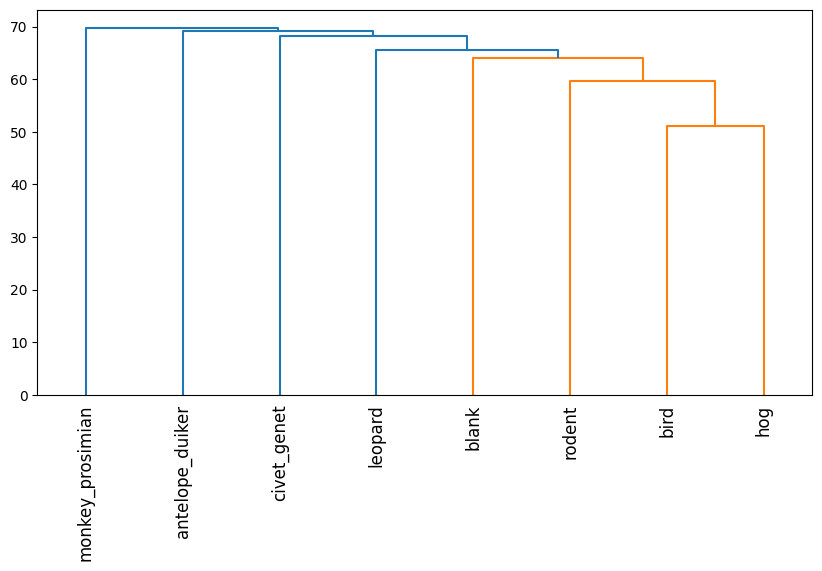

In [ ]:
# Columnas relevantes, es decir, sin las columnas 'id', 'site', 'species'
columns = df_total.columns[2:-1]

# Matriz de distancia
d = hierarchy.distance.pdist(df_total[columns].T)
avD = np.average(d)
print("Distancia Media:{:6.2f}".format(avD))

# Calculo del dendrograma
Z = hierarchy.linkage(d, 'ward')

# Dibujo del dendrograma
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=avD, labels=columns.to_list(), leaf_rotation=90)
plt.show()

Un **dendrograma** es una representación gráfica de las similitudes y diferencias entre diferentes objetos/características o grupos de objetos/características. Los objetos/características o grupos se muestran como nodos, y las conexiones entre ellos representan la similitud o distancia entre ellos. Es un concepto totalmente diferente a la correlación de variables.

Es un tipo de diagrama en forma de árbol utilizado en análisis de clustering (Crear grupos en aprendizaje no supervisado), pero que lo podemos utilizar para analizar las similitudes/cercanía entre características.

### Histograma

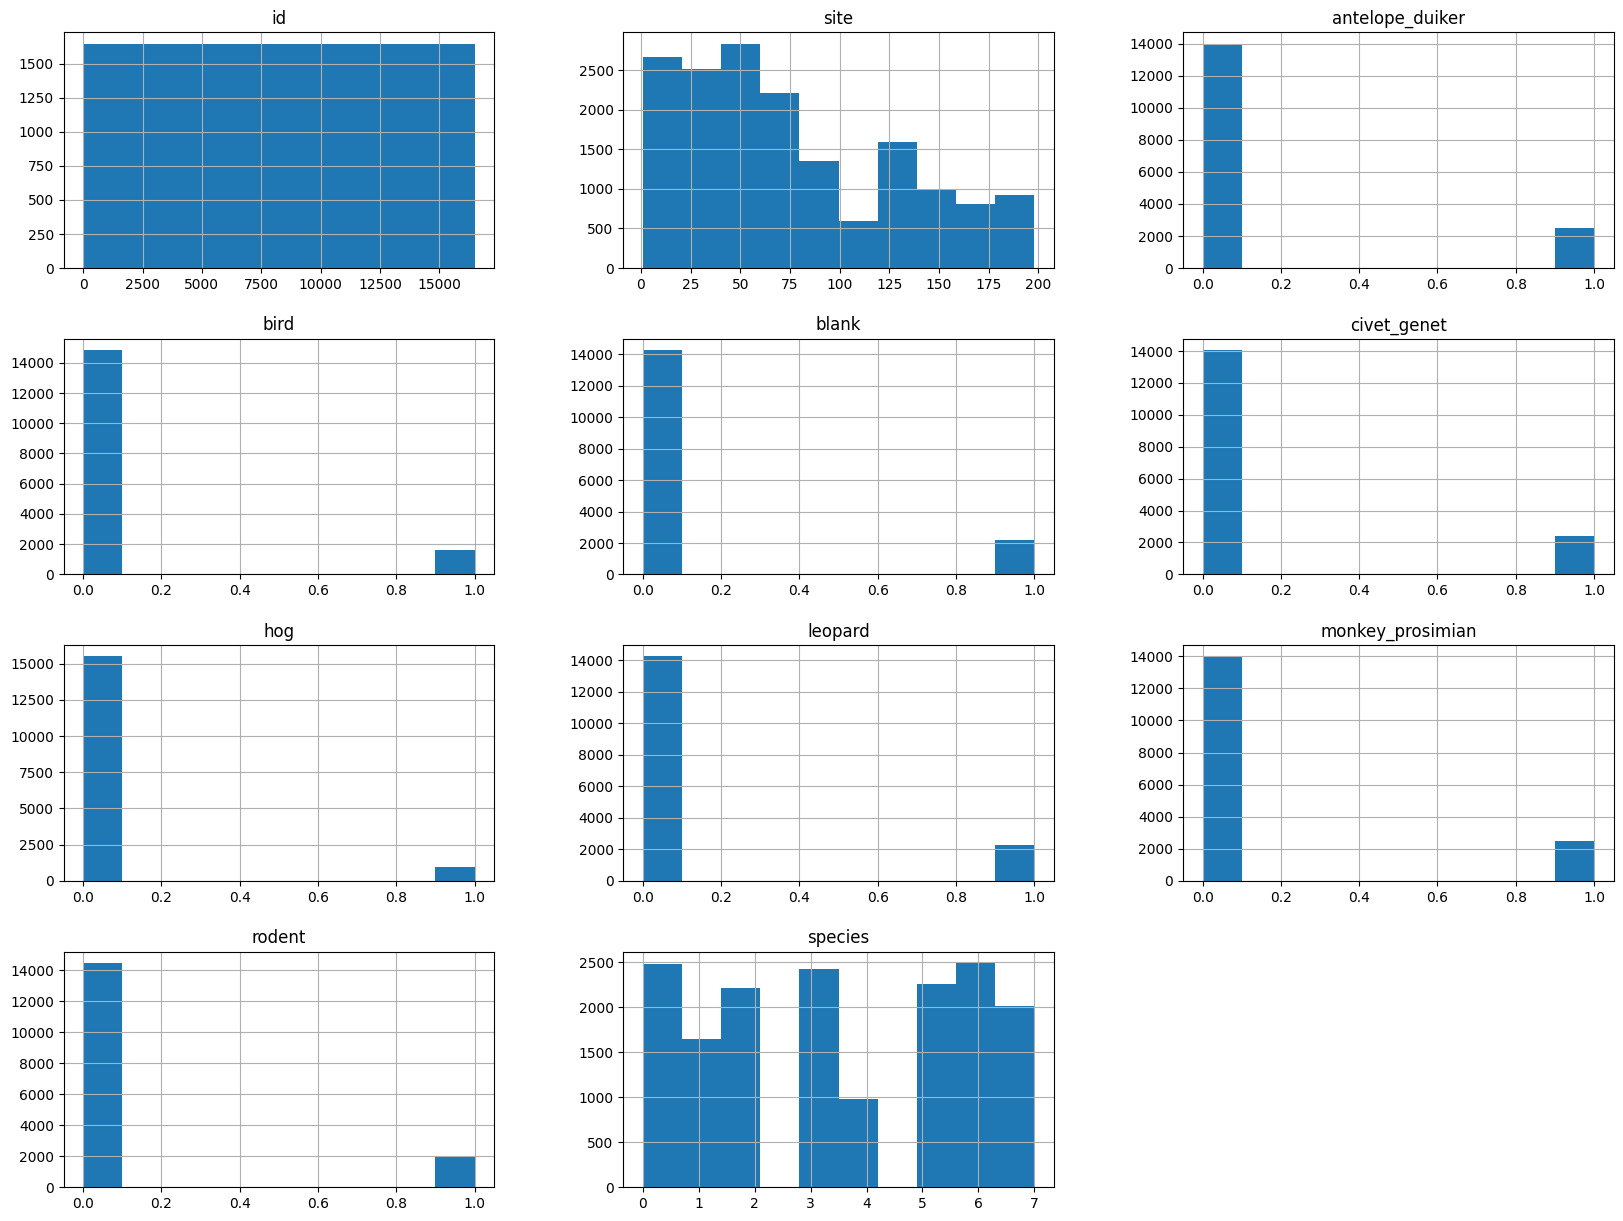

In [ ]:
# Histogramas del Dataframe total

df_total.hist(figsize=(20,15))
plt.show()

El **histograma** se utiliza para representar la distribución de frecuencia de un conjunto de datos. Es una herramienta útil para visualizar la forma de la distribución y para identificar valores atípicos o extremos.

### Gráficas de Densidad

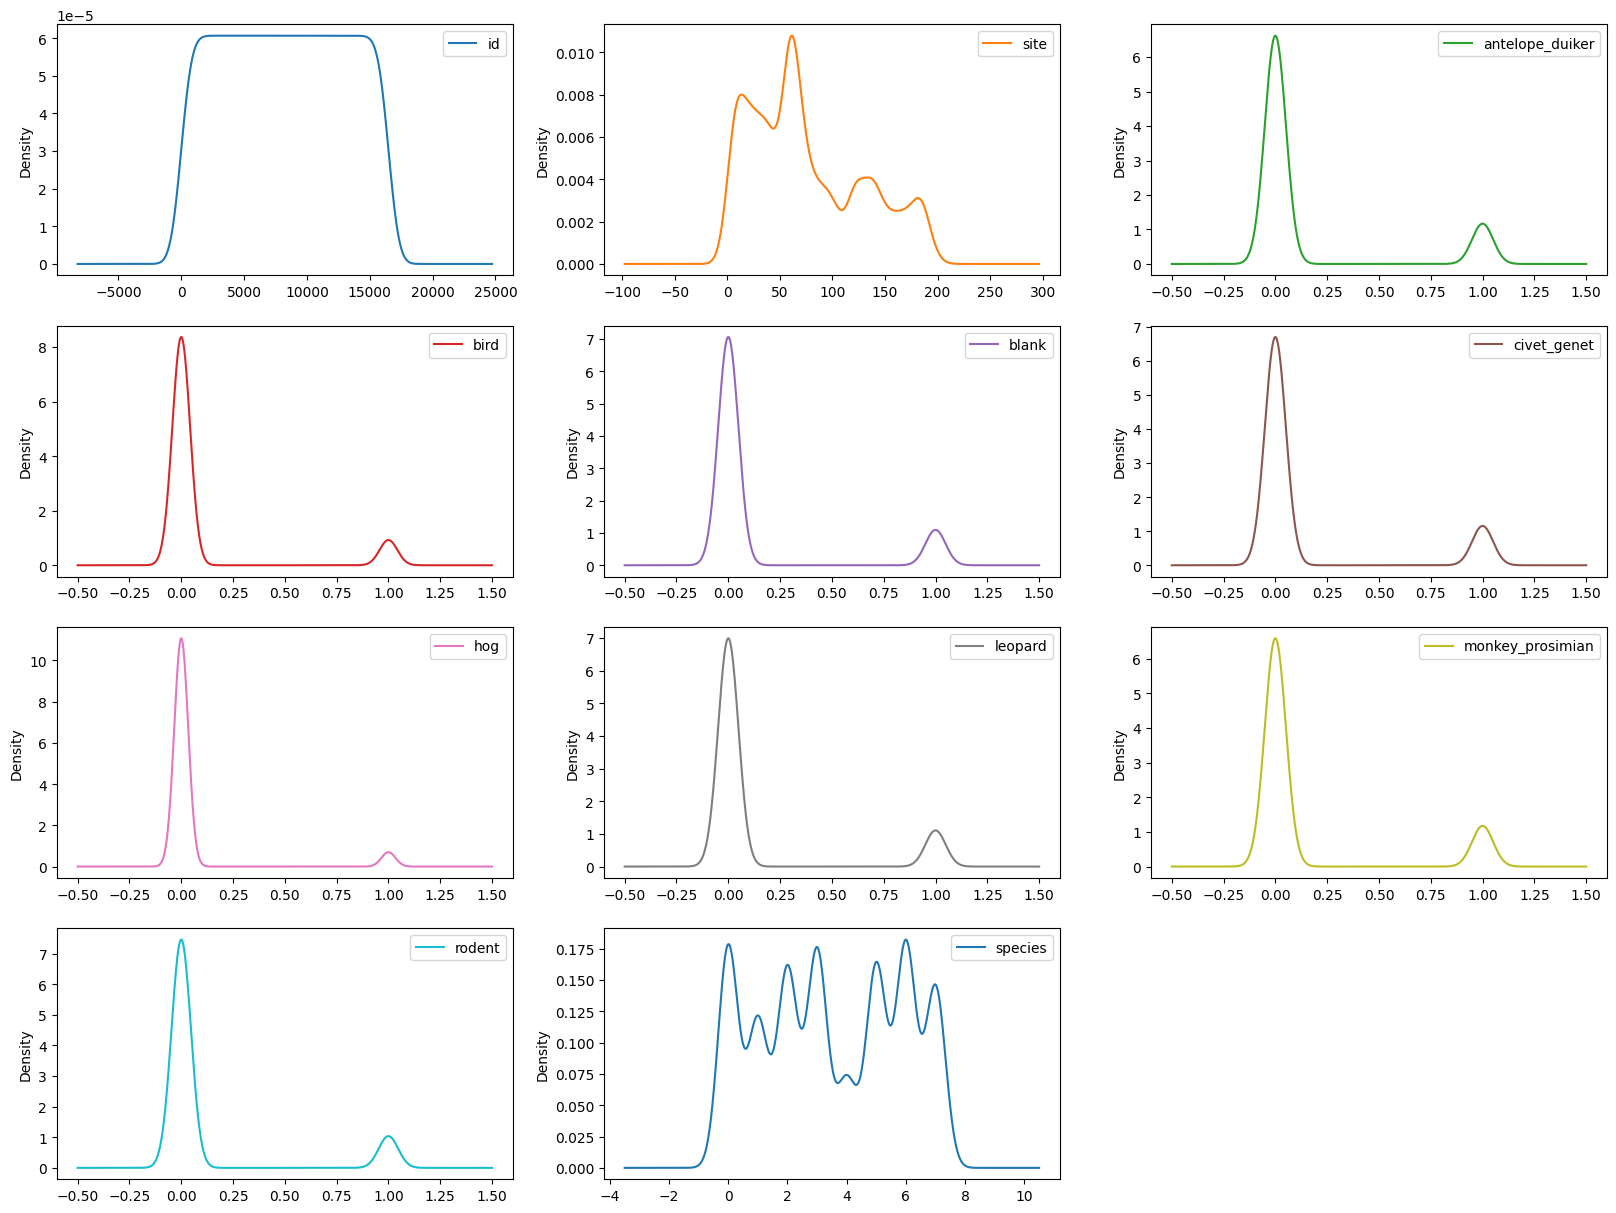

In [ ]:
# Gráficas de densidad

df_total.plot(kind='density', subplots=True, layout=(4,3), figsize=(20,15), sharex=False)
plt.show()

La **gráfica de densidad** se utiliza para representar la distribución de probabilidad de un conjunto de datos continuos. Es una herramienta útil para visualizar la forma de la distribución y comparar la distribución de varios conjuntos de datos.

### Diagrama Pairplot:

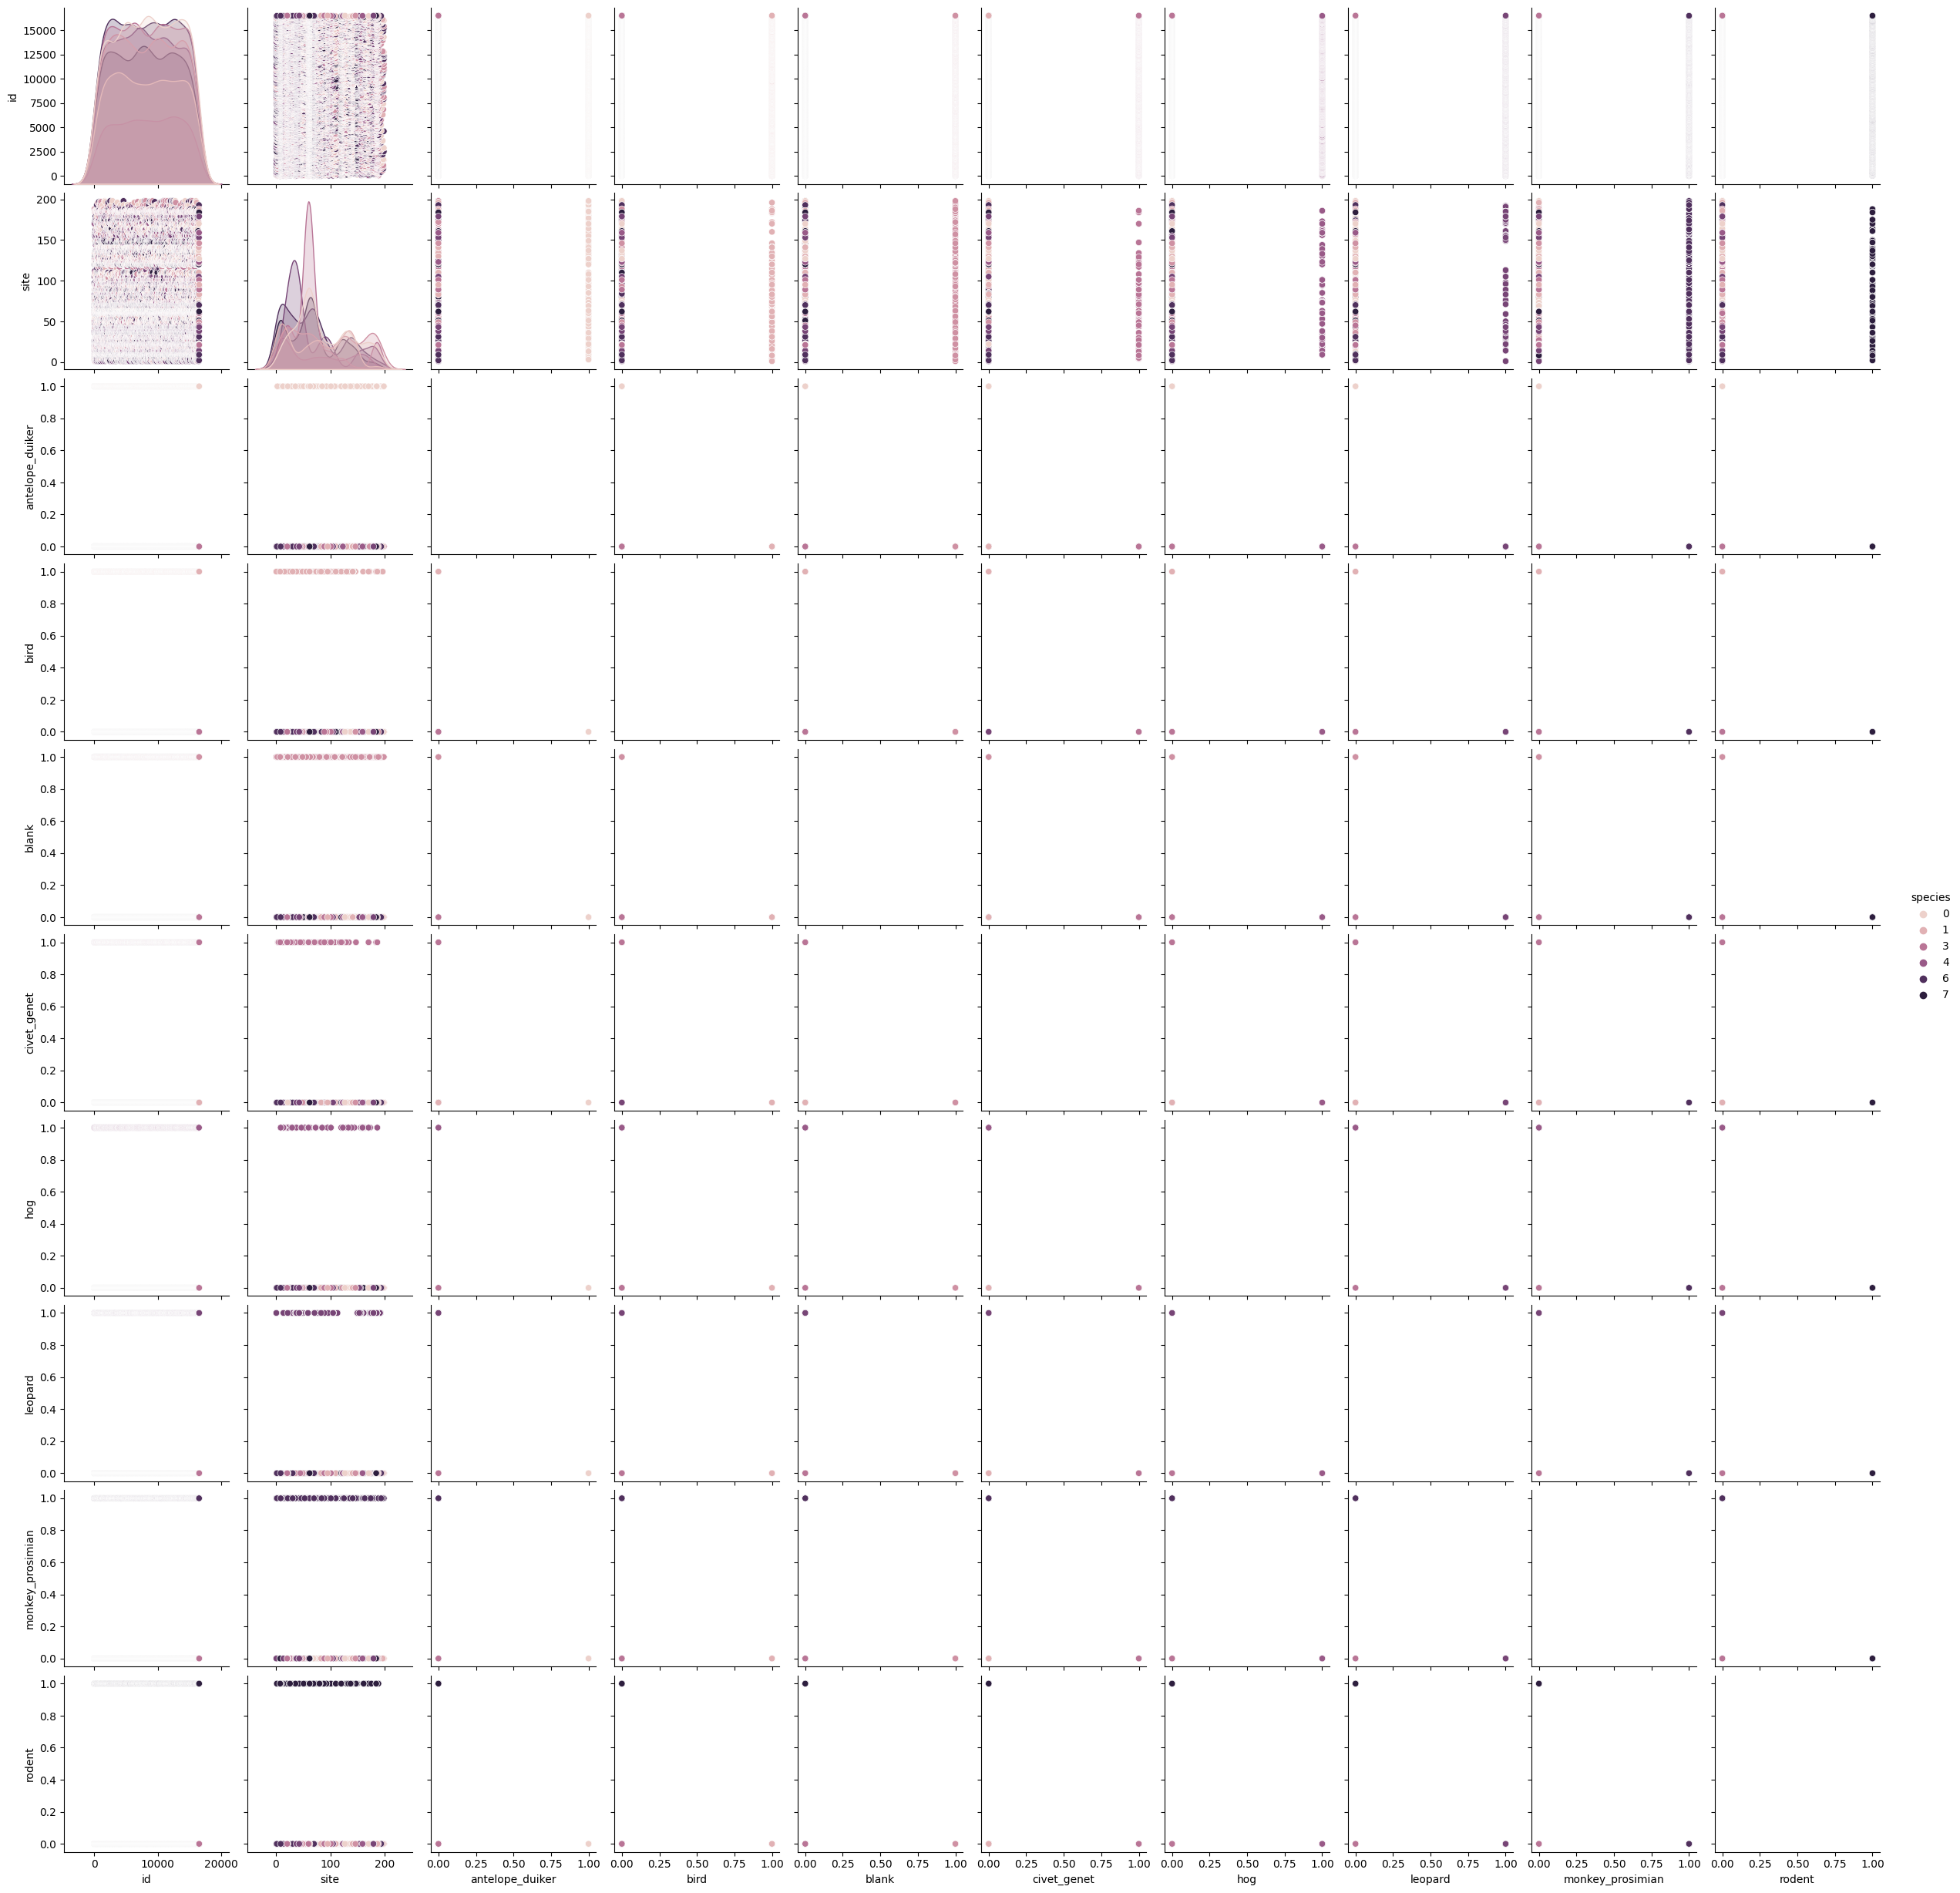

In [ ]:
# Diagrama de pares (pairplot)

sns.pairplot(df_total, hue='species')

El **pairplot** es una herramienta gráfica utilizada para explorar la relación entre múltiples variables en un conjunto de datos. En un pairplot, se generan gráficas de dispersión para cada combinación de variables en el conjunto de datos, y se pueden agregar otras visualizaciones, como histogramas o gráficas de densidad, en la diagonal.

El pairplot es útil porque permite visualizar las relaciones entre múltiples variables de una manera eficiente. Puede ayudar a identificar patrones o tendencias en los datos, como la presencia de relaciones lineales o no lineales, y puede revelar posibles valores atípicos o extremos.

Además, el pairplot es una herramienta útil para la selección de variables en el modelado estadístico o de aprendizaje automático. Puede ayudar a identificar variables altamente correlacionadas, lo que puede ser útil para simplificar el modelo y reducir la complejidad.

### Gráfico de Barras:

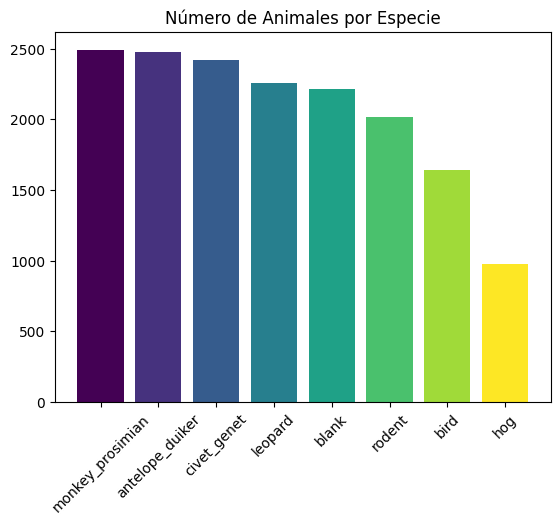

In [ ]:
# Paleta de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(labels_sum)))

# Gráfico de barras con colores diferentes
plt.bar(labels_sum.index, labels_sum, color=colors)

# Etiquetas en el eje x
plt.xticks(rotation=45)

# Etiquetas y título del gráfico
plt.title("Número de Animales por Especie")

# Muestra el gráfico
plt.show()

El **gráfico de barras** es una forma de resumir un conjunto de datos por categorías de variable cualitativa y su frecuencia de aparición en una muestra.

### Gráfico tipo Donut:

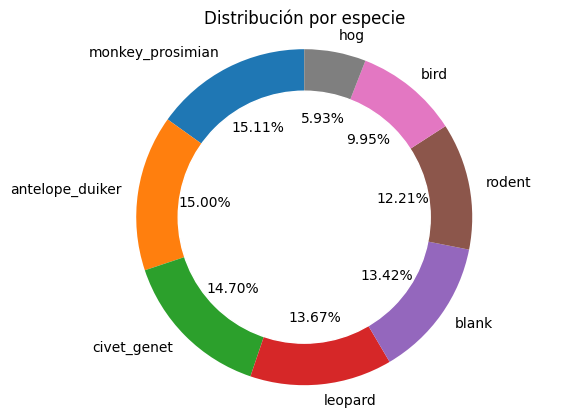

In [ ]:
# Gráfico tipo donut
plt.pie(labels_ratio, labels=labels_ratio.index, autopct='%1.2f%%', startangle=90)
plt.axis('equal')

# Agrega un círculo blanco en el centro para crear el aspecto de un donut
circle = plt.Circle((0, 0), 0.75, color='white')
plt.gca().add_artist(circle)

# Título del gráfico
plt.title("Distribución por especie")

# Muestra el gráfico
plt.show()

La **gráfica tipo donut** es un recurso estadístico que se utiliza para representar porcentajes y proporciones.

### Visualización de Datos en Qlik:

**Qlik**: Plataforma software para inteligencia de negocios, y análisis e integración de datos. 

Qlik es bastante fácil de manejar y permite utilizar e introducir gran cantidad de datos, que pueden proceder de diferentes formatos. Una vez introducidos se pueden manipular y organizar libremente según como se quieran presentar, para conseguir el objetivo final, que es obtener una forma atractiva de visualizar cantidades de datos. Entre sus características más destacadas está la de poseer los datos integrados en el propio cuadro de mandos, posibilitando trabajar con ellos sin la necesidad de estar conectado al origen de donde proceden. Uno de los puntos fuertes de Qlik es que no es necesario dominar la herramienta, al ser bastante intuitiva.

|||
|-|-|
|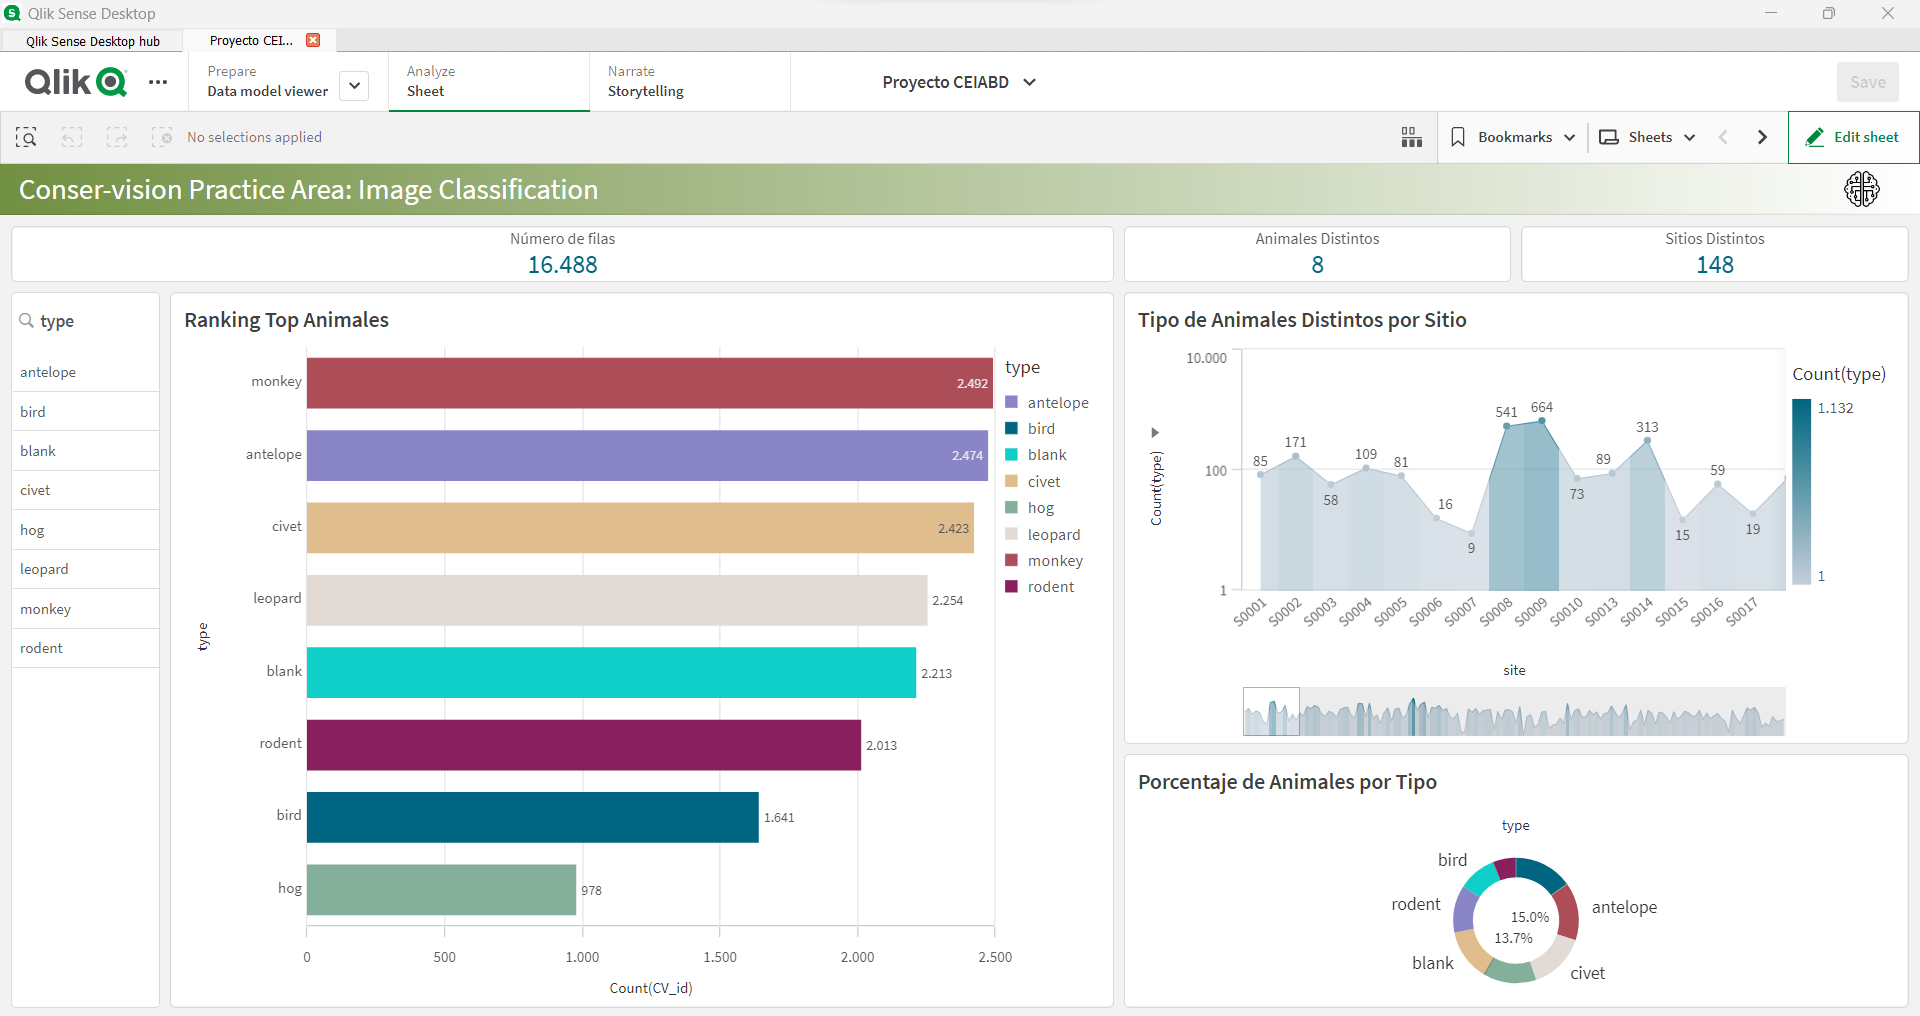|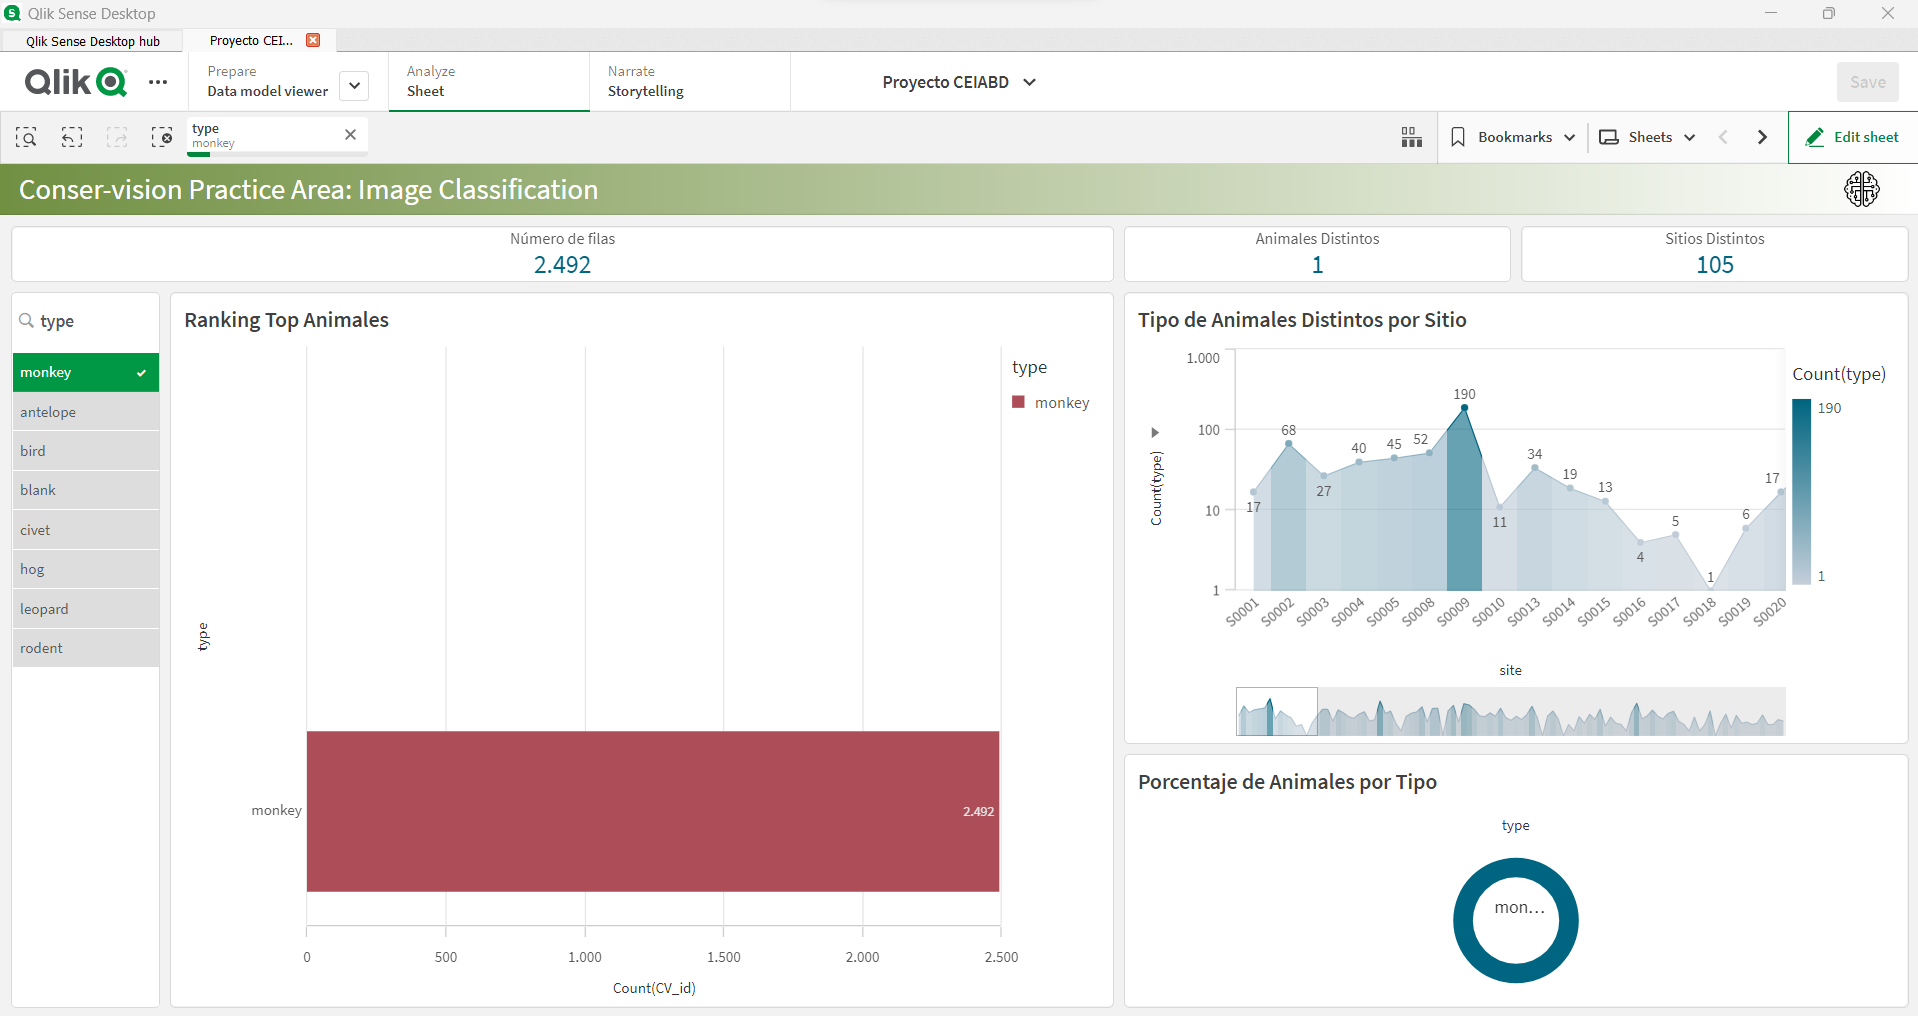|

## Entrenamiento:

In [ ]:
# Comando para mostrar información sobre la GPU en Colab

!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
# Hiperparámetros del modelo
# - input_shape: forma de los datos de entrada
# - num_classes: número de animales
# - epochs: número de veces que se pasa por todo el conjunto de entrenamiento
# - batch_size: número de muestras que se usan en cada actualización de los pesos del modelo

input_shape = (75, 75, 3)             # Imágenes de 75x75 píxeles con 3 canales de color
num_classes = len(np.unique(y))
epochs = 20
batch_size = 75

### División de los datos en entrenamiento y test:

In [ ]:
# - test_size: proporción de datos que se asigna al conjunto de validación
# - random_state: valor generador de números aleatorios que determina la forma de dividir los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[[[0.44313725, 0.75686275, 0.58823529],
         [0.3372549 , 0.69019608, 0.55686275],
         [0.23921569, 0.55294118, 0.42745098],
         ...,
         [0.19607843, 0.41176471, 0.28627451],
         [0.31372549, 0.56470588, 0.4627451 ],
         [0.25098039, 0.50588235, 0.35294118]],

        [[0.42745098, 0.81568627, 0.65098039],
         [0.3254902 , 0.6745098 , 0.50588235],
         [0.31764706, 0.6745098 , 0.50588235],
         ...,
         [0.47843137, 0.66666667, 0.58431373],
         [0.19215686, 0.45098039, 0.37647059],
         [0.21568627, 0.40784314, 0.29803922]],

        [[0.25490196, 0.60784314, 0.49411765],
         [0.2627451 , 0.5372549 , 0.41176471],
         [0.30588235, 0.66666667, 0.49411765],
         ...,
         [0.46666667, 0.63921569, 0.52156863],
         [0.43137255, 0.69019608, 0.58823529],
         [0.26666667, 0.54901961, 0.4       ]],

        ...,

        [[0.05882353, 0.40392157, 0.8       ],
         [0.36862745, 0.45098039, 0.61176471]

In [ ]:
y_train

16319    1
5333     0
6875     1
3930     1
1236     6
        ..
9225     3
13123    7
9845     2
10799    6
2732     6
Length: 13190, dtype: int64

In [ ]:
# Dimensiones de los datos de entrenamiento y test:

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13190, 75, 75, 3), (13190,), (3298, 75, 75, 3), (3298,))

In [ ]:
splits = pd.DataFrame({
  "species": labels,                                  # Etiquetas de especies
  "train": y_train.value_counts(normalize=True),      # Cuenta y normaliza las especies en y_train
  "test": y_test.value_counts(normalize=True),        # Cuenta y normaliza las especies en y_test
})

print("Porcentaje de especies por división")
splits[["train", "test"]] = round((splits[["train", "test"]] * 100), 2)
splits

Porcentaje de especies por división


species  train   test
0   antelope_duiker  15.03  14.92
1              bird   9.90  10.16
2             blank  13.22  14.22
3       civet_genet  14.89  13.92
4               hog   5.82   6.37
5           leopard  13.78  13.22
6  monkey_prosimian  15.10  15.16
7            rodent  12.25  12.04

Validación de que la división haya dado como resultado distribuciones relativas de especies similares en los conjuntos de train y test

### División de los datos en entrenamiento y validación:

In [ ]:
# - test_size: proporción de datos que se asigna al conjunto de validación
# - random_state: valor generador de números aleatorios que determina la forma de dividir los datos

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=0)

In [ ]:
# Dimensiones de los datos de entrenamiento y validación:

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((15663, 75, 75, 3), (15663,), (825, 75, 75, 3), (825,))

In [ ]:
splits = pd.DataFrame({
  "species": labels,                                  # Etiquetas de especies
  "train": y_train.value_counts(normalize=True),      # Cuenta y normaliza las especies en y_train
  "val": y_val.value_counts(normalize=True),          # Cuenta y normaliza las especies en y_val
})

print("Porcentaje de especies por división")
splits[["train", "val"]] = round((splits[["train", "val"]] * 100), 2)
splits

Porcentaje de especies por división


species  train    val
0   antelope_duiker  15.01  14.91
1              bird   9.91  10.79
2             blank  13.34  15.03
3       civet_genet  14.79  12.97
4               hog   5.94   5.70
5           leopard  13.68  13.58
6  monkey_prosimian  15.07  16.00
7            rodent  12.27  11.03

Validación de que la división haya dado como resultado distribuciones relativas de especies similares en los conjuntos de train y validation

### Codificación de las etiquetas y:

In [ ]:
# Codificar las etiquetas en formato de one-hot encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

One-hot es un grupo de bits entre los cuales las combinaciones legales de valores son solo aquellas con un solo bit 1 y todas las demás a 0.

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Dimensiones de los datos de y de entrenamiento, test y validación:

y_train.shape, y_test.shape, y_val.shape

((15663, 8), (3298, 8), (825, 8))

### Modelo de **Red Fully Connected**:

Un **modelo de red fully connected**, es un tipo de arquitectura de red neuronal artificial. En este tipo de modelo, cada neurona de una capa está conectada con todas las neuronas de la capa siguiente, creando una estructura de conexión densa.

En un modelo de red fully connected, las capas de entrada y salida están completamente conectadas con una o varias capas ocultas en el medio. Cada neurona en una capa oculta toma como entrada todas las salidas de las neuronas en la capa anterior y genera una salida que se conecta a todas las neuronas en la capa siguiente. Este patrón de conexión se repite en todas las capas hasta llegar a la capa de salida.

La principal ventaja de este tipo de modelo es su capacidad para capturar relaciones complejas y no lineales entre las variables de entrada y salida. Sin embargo, a medida que el número de neuronas y capas aumenta, también lo hace la complejidad computacional y la necesidad de datos de entrenamiento suficientes.

In [ ]:
# Modelo de Red Fully Connected:
# - Flatten: capa de aplanamiento, convierte la imagen de entrada en un vector unidimensional
# - Dense: capa densamente conectada
# - ReLU (rectified linear unit): máximo entre cero y el valor de entrada
# - Softmax: distribución de probabilidad sobre las clases de salida

# Creación del modelo secuencial
model_fc = models.Sequential()

# Capa de aplanamiento de la entrada
model_fc.add(layers.Flatten(input_shape=input_shape))

# Capa densa con 256 unidades y activación ReLU
model_fc.add(layers.Dense(256, activation='relu'))

# Capa densa con 256 unidades y activación ReLU
model_fc.add(layers.Dense(256, activation='relu'))

# Capa densa con 256 unidades y activación ReLU
model_fc.add(layers.Dense(256, activation='relu'))

# Capa densa de salida con el número de clases y activación Softmax
model_fc.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compilación del modelo
# - optimizer='adam': adapta automáticamente la tasa de aprendizaje durante el entrenamiento
# - loss='categorical_crossentropy': entropía cruzada categórica, comúnmente utilizada en la clasificación de múltiples clases
# - metrics=['accuracy']: (precisión), mide la proporción de muestras clasificadas correctamente

model_fc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
# - epochs: número de veces que se pasa por todo el conjunto de entrenamiento
# - batch_size: número de muestras que se usan en cada actualización de los pesos del modelo
# - validation_data: conjunto de datos para evaluar la pérdida y las métricas del modelo al final de cada época

# Entrenamiento del modelo con los datos de entrenamiento y validación
print("Comenzando entrenamiento...")
history = model_fc.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
print("¡Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/20
209/209 [==============================] - 12s 52ms/step - loss: 1.9833 - accuracy: 0.3098 - val_loss: 1.6183 - val_accuracy: 0.3842
Epoch 2/20
209/209 [==============================] - 10s 47ms/step - loss: 1.5612 - accuracy: 0.4044 - val_loss: 1.5553 - val_accuracy: 0.4012
Epoch 3/20
209/209 [==============================] - 9s 44ms/step - loss: 1.4169 - accuracy: 0.4664 - val_loss: 1.3583 - val_accuracy: 0.4824
Epoch 4/20
209/209 [==============================] - 10s 49ms/step - loss: 1.3425 - accuracy: 0.5002 - val_loss: 1.3582 - val_accuracy: 0.4897
Epoch 5/20
209/209 [==============================] - 10s 48ms/step - loss: 1.2602 - accuracy: 0.5342 - val_loss: 1.6082 - val_accuracy: 0.4036
Epoch 6/20
209/209 [==============================] - 9s 45ms/step - loss: 1.1842 - accuracy: 0.5660 - val_loss: 1.2767 - val_accuracy: 0.5455
Epoch 7/20
209/209 [==============================] - 9s 45ms/step - loss: 1.1074 - accuracy: 0.5918 - val_los

#### Evaluación del Modelo:

In [ ]:
# Evaluación del modelo en el conjunto de datos de test

test_loss, test_acc = model_fc.evaluate(X_test, y_test, verbose=2)
print('Evaluación:', test_acc)

104/104 - 1s - loss: 0.7154 - accuracy: 0.7401 - 813ms/epoch - 8ms/step
Evaluación: 0.7401455640792847


#### Análisis de resultados:

In [ ]:
# Predicción con los datos de test

prediccion = model_fc.predict(X_test)

# Métricas de precisión y recall por clase
# - precision: fracción de predicciones correctas para cada clase
# - recall: fracción de imágenes reales de cada clase que se predicen correctamente
# - Estas métricas se calculan comparando las etiquetas verdaderas (y_t) con las predichas (prediccion).

informe = classification_report(
  np.argmax(y_test,axis=1), 
  np.argmax(prediccion,axis=1), 
  target_names=labels
)
print(informe)

104/104 [==============================] - 1s 7ms/step
                  precision    recall  f1-score   support

 antelope_duiker       0.61      0.59      0.60       492
            bird       0.98      0.70      0.81       335
           blank       0.56      0.40      0.47       469
     civet_genet       0.91      0.90      0.91       459
             hog       0.90      0.79      0.84       210
         leopard       0.78      0.94      0.85       436
monkey_prosimian       0.84      0.73      0.78       500
          rodent       0.58      0.95      0.72       397

        accuracy                           0.74      3298
       macro avg       0.77      0.75      0.75      3298
    weighted avg       0.75      0.74      0.74      3298



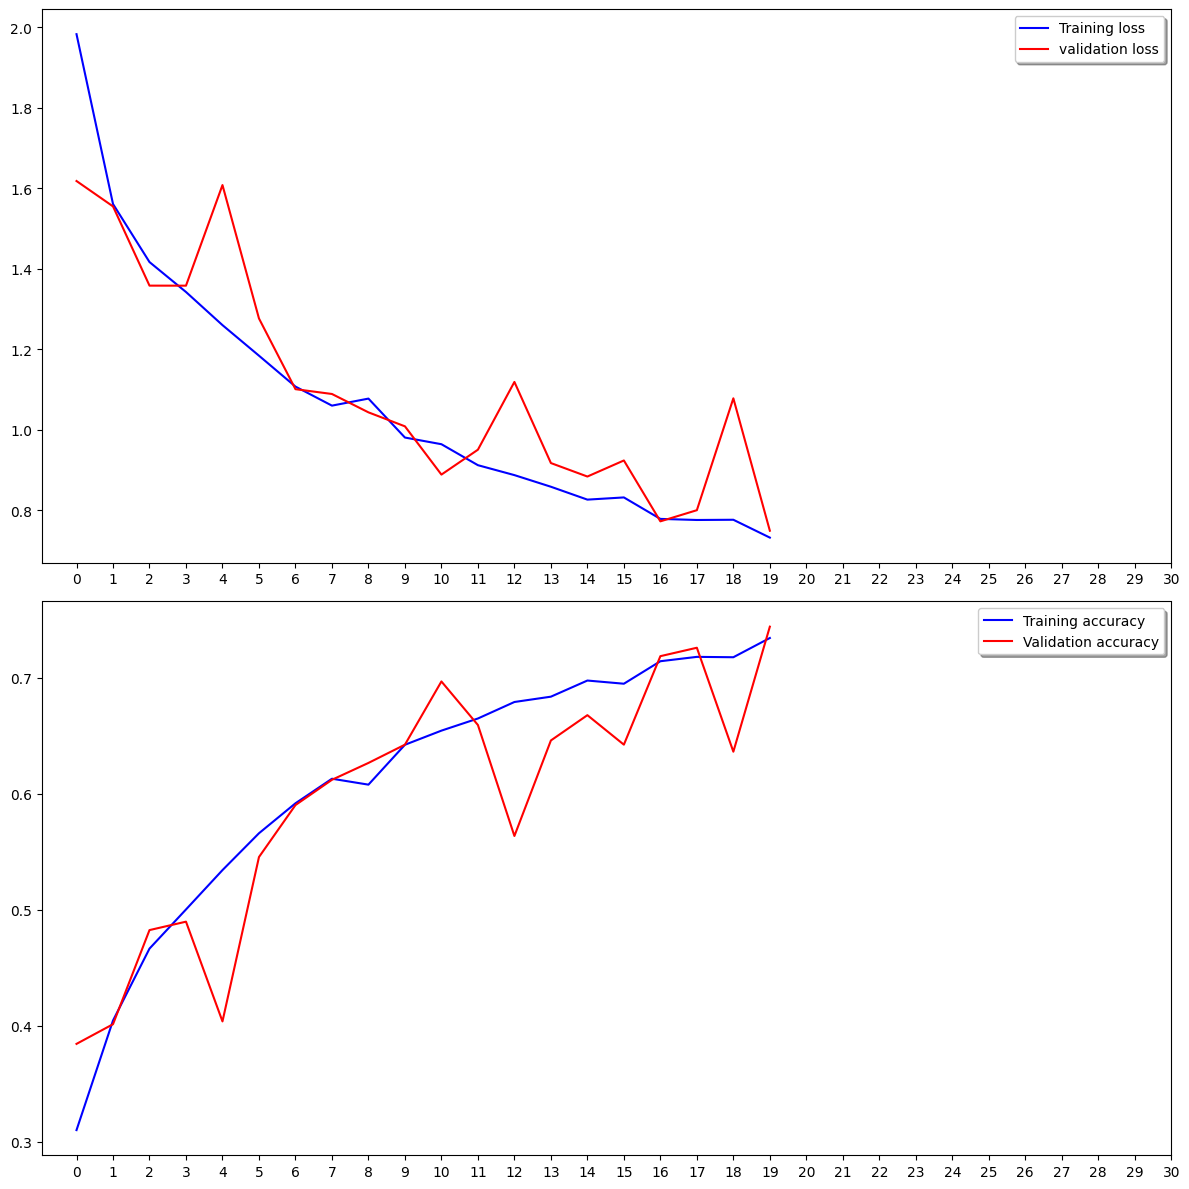

In [ ]:
# Gráficos del historial de evaluación del modelo

# El primer gráfico (ax1), traza la curva de pérdida del modelo durante el entrenamiento (color azul) 
# y durante la validación (color rojo) en función del número de épocas. 
# La pérdida es una medida del error del modelo que se quiere minimizar. 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(31))
ax1.legend(loc='best', shadow=True)

# El segundo gráfico (ax2), traza la curva de precisión del modelo durante el entrenamiento (color azul)
# y durante la validación (color rojo) en función del número de épocas. 
# La precisión es la fracción de predicciones correctas del modelo que se quiere maximizar.

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(31))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### Predicción del modelo:

In [ ]:
# Predicción de las especies de animales con los datos de submit
prediccion = model_fc.predict(X_submit)
prediccion

140/140 [==============================] - 1s 10ms/step


array([[6.5440649e-01, 1.8093408e-05, 2.0363653e-01, ..., 3.0955398e-03,
        1.2047401e-04, 1.3689028e-01],
       [1.5379992e-01, 1.6112100e-02, 1.6425431e-01, ..., 3.5497212e-01,
        2.0134211e-02, 2.0366704e-01],
       [3.4592237e-02, 1.6362891e-07, 3.6282957e-02, ..., 6.0057390e-01,
        3.9341376e-06, 3.6169826e-03],
       ...,
       [6.1702347e-01, 8.4978583e-06, 1.4887357e-01, ..., 4.6206750e-03,
        6.3468906e-06, 4.4745589e-03],
       [1.1311266e-01, 3.4063998e-01, 1.8115607e-01, ..., 1.5147768e-02,
        2.5164628e-01, 8.0719523e-02],
       [1.2761553e-01, 6.7154006e-03, 1.7418420e-01, ..., 6.1193746e-01,
        1.2393482e-02, 5.5003494e-02]], dtype=float32)

#### Exportación de la predicción:

In [ ]:
# Crear DataFrame con las predicciones y nombres de columnas
df_predictions = pd.DataFrame(prediccion, columns=labels)

# Formatear los valores en notación científica a formato decimal
df_predictions = df_predictions.applymap(lambda x: '{:.6f}'.format(x))

# Agregar columna 'id' a df_predictions
df_predictions.insert(0, 'id', df_format['id'])

df_predictions

id antelope_duiker      bird     blank civet_genet       hog  \
0     ZJ016488        0.654406  0.000018  0.203637    0.001260  0.000572   
1     ZJ016489        0.153800  0.016112  0.164254    0.019959  0.067101   
2     ZJ016490        0.034592  0.000000  0.036283    0.001373  0.323557   
3     ZJ016491        0.000121  0.000000  0.000723    0.000006  0.077428   
4     ZJ016492        0.056364  0.002730  0.092931    0.000005  0.000475   
...        ...             ...       ...       ...         ...       ...   
4459  ZJ020947        0.349561  0.008262  0.259976    0.000300  0.004138   
4460  ZJ020948        0.129988  0.059161  0.194337    0.007117  0.056966   
4461  ZJ020949        0.617023  0.000008  0.148874    0.206104  0.018889   
4462  ZJ020950        0.113113  0.340640  0.181156    0.001319  0.016258   
4463  ZJ020951        0.127616  0.006715  0.174184    0.001035  0.011115   

       leopard monkey_prosimian    rodent  
0     0.003096         0.000120  0.136890  
1     0.354972         0.020134  0.203667  
2     0.600574         0.000004  0.003617  
3     0.921721         0.000000  0.000001  
4     0.826068         0.010307  0.011120  
...        ...              ...       ...  
4459  0.016926         0.347715  0.013122  
4460  0.360644         0.059200  0.132586  
4461  0.004621         0.000006  0.004475  
4462  0.015148         0.251646  0.080720  
4463  0.611937         0.012393  0.055003  

[4464 rows x 9 columns]

In [ ]:
# Guarda el DataFrame en un archivo CSV
df_predictions.to_csv('fully.csv', index=False)
files.download('fully.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Resultado:

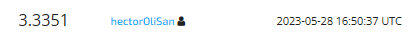

### Modelo de **Red Neuronal Convolucional** (**CNNs**):

Un **modelo de Red Neuronal Convolucional** es un tipo de arquitectura de red neuronal diseñada específicamente para procesar datos estructurados, como imágenes o secuencias, y se ha destacado por su capacidad para capturar patrones espaciales y de correlación en los datos de entrada.

A diferencia de las redes fully connected, las CNNs utilizan capas de convolución que aplican filtros en pequeñas regiones del espacio de entrada. Estos filtros extraen características locales y las combinan para formar representaciones más abstractas a medida que se profundiza en la red. Esta estructura jerárquica de capas de convolución permite a la CNN aprender de manera automática características relevantes y útiles en diferentes niveles de abstracción.

Además de las capas de convolución, las CNNs suelen incluir capas de pooling, que reducen la dimensionalidad de las características espaciales, y capas completamente conectadas al final para realizar la clasificación o regresión final.

In [ ]:
# Crear el modelo base de InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar los pesos del modelo base
base_model.trainable = False

InceptionV3, desarrollada por Google, es una red neuronal convolucional (CNN) para ayudar en el análisis de imágenes y la detección de objetos. 

Utiliza una combinación de capas convolucionales de 3x3 y de 5x5, junto con operaciones de pooling y convoluciones factorizadas, para lograr una mayor eficiencia computacional.

In [ ]:
# Modelo de Red Neuronal Convolucional (CNNs)
# - Conv2D: Capa convolucional
# - MaxPooling2D: Agrupación máxima, reduce el tamaño de la salida de la capa anterior y elimina información redundante
# - BatchNormalization: Normalización por lotes, estandariza los valores de entrada y acelera el entrenamiento
# - Flatten: Aplana la salida de la última capa convolucional en un vector unidimensional
# - Dropout: Apaga aleatoriamente un porcentaje de las unidades del vector anterior para evitar el sobreajuste
# - Dense: capa densamente conectada
# - ReLU (rectified linear unit): máximo entre cero y el valor de entrada
# - Softmax: distribución de probabilidad sobre las clases de salida

# Creación del modelo secuencial
model = models.Sequential()

# Añade el modelo base pre-entrenado InceptionV3
model.add(base_model)

# Capa de promedio global para reducir la dimensionalidad
model.add(layers.GlobalAveragePooling2D())

# Capa de regularización Dropout para evitar sobreajuste
model.add(layers.Dropout(0.1))

# Capa densa con 1024 unidades y activación ReLU
model.add(layers.Dense(1024, activation='relu'))

# Capa densa de salida con el número de clases y activación Softmax
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compilación del modelo
# - optimizer='adam': adapta automáticamente la tasa de aprendizaje durante el entrenamiento
# - loss='categorical_crossentropy': entropía cruzada categórica, comúnmente utilizada en la clasificación de múltiples clases
# - metrics=['accuracy']: (precisión), mide la proporción de muestras clasificadas correctamente

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Instancia de ImageDataGenerator para data augmentation
# - Generador de datos de imágenes que aplica transformaciones aleatorias a las imágenes de entrenamiento 
#   para aumentar la variedad y evitar el sobreajuste. Los parámetros indican el rango de rotación, desplazamiento, 
#   corte, zoom y volteo horizontal que se pueden aplicar a las imágenes.

train_datagen = ImageDataGenerator (
  rotation_range=20, width_shift_range=0.2,
  height_shift_range=0.2, shear_range=0.2,
  zoom_range=0.2, horizontal_flip=True
)

El data augmentation es una técnica en el aprendizaje automático utilizada para reducir el sobreajuste al entrenar un modelo de aprendizaje automático, mediante el entrenamiento de modelos en varias copias ligeramente modificadas de datos existentes.

In [ ]:
# Entrenamiento del modelo con data augmentation
# - epochs: número de veces que se pasa por todo el conjunto de entrenamiento
# - batch_size: número de muestras que se usan en cada actualización de los pesos del modelo
# - validation_data: conjunto de datos para evaluar la pérdida y las métricas del modelo al final de cada época

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# Entrenamiento del modelo con los datos de entrenamiento y validación
print("Comenzando entrenamiento...")
history = model.fit(train_generator, epochs=epochs, validation_data=(X_val, y_val))
print("¡Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/20
209/209 [==============================] - 115s 528ms/step - loss: 1.6614 - accuracy: 0.3702 - val_loss: 1.5018 - val_accuracy: 0.4436
Epoch 2/20
209/209 [==============================] - 115s 547ms/step - loss: 1.5055 - accuracy: 0.4234 - val_loss: 1.4740 - val_accuracy: 0.4230
Epoch 3/20
209/209 [==============================] - 110s 525ms/step - loss: 1.4525 - accuracy: 0.4414 - val_loss: 1.4356 - val_accuracy: 0.4327
Epoch 4/20
209/209 [==============================] - 109s 522ms/step - loss: 1.4250 - accuracy: 0.4493 - val_loss: 1.4033 - val_accuracy: 0.4533
Epoch 5/20
209/209 [==============================] - 109s 522ms/step - loss: 1.4021 - accuracy: 0.4616 - val_loss: 1.3878 - val_accuracy: 0.4630
Epoch 6/20
209/209 [==============================] - 109s 522ms/step - loss: 1.3727 - accuracy: 0.4723 - val_loss: 1.3791 - val_accuracy: 0.4836
Epoch 7/20
209/209 [==============================] - 110s 524ms/step - loss: 1.3599 - accuracy:

#### Evaluación del modelo:

In [ ]:
# Evaluación del modelo en el conjunto de datos de test

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Evaluación:', test_acc)

104/104 - 19s - loss: 1.1935 - accuracy: 0.5431 - 19s/epoch - 183ms/step
Evaluación: 0.5430563688278198


#### Análisis de resultados:

In [ ]:
# Predicción con los datos de test

prediccion = model.predict(X_test)

# Métricas de precisión y recall por clase
# - precision: fracción de predicciones correctas para cada clase
# - recall: fracción de imágenes reales de cada clase que se predicen correctamente
# - Estas métricas se calculan comparando las etiquetas verdaderas (y_t) con las predichas (prediccion).

informe = classification_report(
  np.argmax(y_test,axis=1), 
  np.argmax(prediccion,axis=1), 
  target_names=labels
)
print(informe)

104/104 [==============================] - 21s 188ms/step
                  precision    recall  f1-score   support

 antelope_duiker       0.40      0.27      0.33       492
            bird       0.57      0.40      0.47       335
           blank       0.53      0.23      0.32       469
     civet_genet       0.67      0.88      0.76       459
             hog       0.74      0.68      0.71       210
         leopard       0.78      0.71      0.74       436
monkey_prosimian       0.38      0.73      0.50       500
          rodent       0.52      0.49      0.51       397

        accuracy                           0.54      3298
       macro avg       0.58      0.55      0.54      3298
    weighted avg       0.56      0.54      0.53      3298



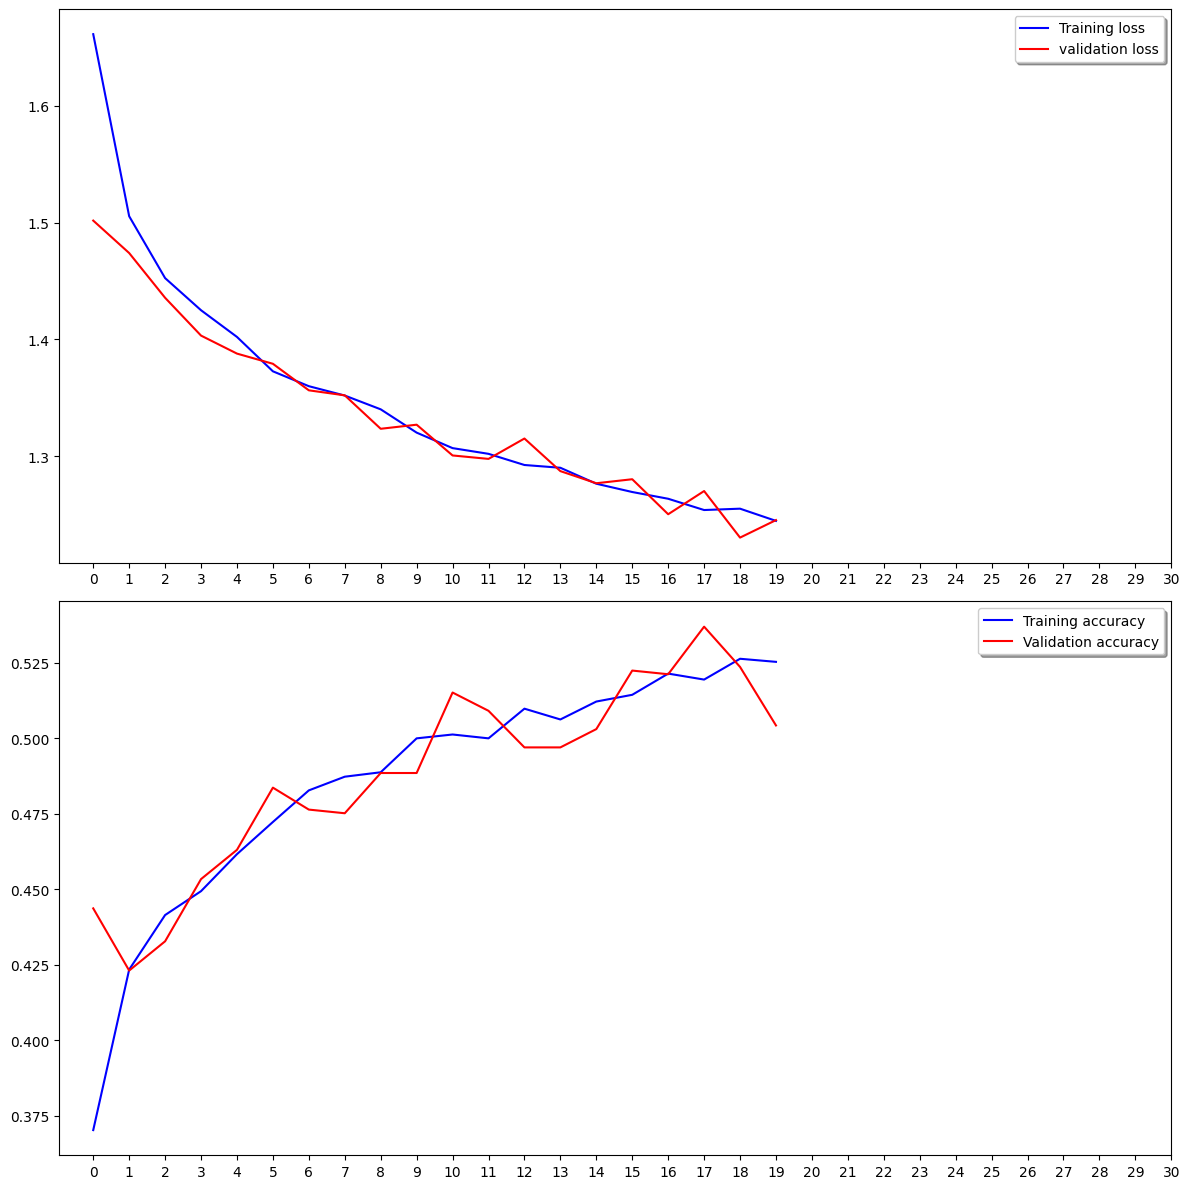

In [ ]:
# Gráficos del historial de evaluación del modelo

# El primer gráfico (ax1), traza la curva de pérdida del modelo durante el entrenamiento (color azul) 
# y durante la validación (color rojo) en función del número de épocas. 
# La pérdida es una medida del error del modelo que se quiere minimizar. 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(31))
ax1.legend(loc='best', shadow=True)

# El segundo gráfico (ax2), traza la curva de precisión del modelo durante el entrenamiento (color azul)
# y durante la validación (color rojo) en función del número de épocas. 
# La precisión es la fracción de predicciones correctas del modelo que se quiere maximizar.

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(31))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### Exportación de la predicción:

In [ ]:
# Predicción de las especies de animales con los datos de submit
prediccion = model.predict(X_submit)

140/140 [==============================] - 36s 255ms/step


In [ ]:
# Crear DataFrame con las predicciones y nombres de columnas
df_predictions = pd.DataFrame(prediccion, columns=labels)

# Formatear los valores en notación científica a formato decimal
df_predictions = df_predictions.applymap(lambda x: '{:.6f}'.format(x))

# Agregar columna 'id' a df_predictions
df_predictions.insert(0, 'id', df_format['id'])

df_predictions

id antelope_duiker      bird     blank civet_genet       hog  \
0     ZJ016488        0.318770  0.043887  0.157836    0.151175  0.015980   
1     ZJ016489        0.219541  0.153212  0.138961    0.031746  0.077162   
2     ZJ016490        0.055942  0.000389  0.033066    0.781923  0.012975   
3     ZJ016491        0.237154  0.016921  0.133647    0.025943  0.345519   
4     ZJ016492        0.146319  0.156209  0.129533    0.038904  0.061123   
...        ...             ...       ...       ...         ...       ...   
4459  ZJ020947        0.262848  0.011187  0.294059    0.007478  0.078619   
4460  ZJ020948        0.190486  0.414060  0.093681    0.005725  0.003538   
4461  ZJ020949        0.168493  0.019747  0.140636    0.416241  0.092876   
4462  ZJ020950        0.240282  0.236013  0.093832    0.001040  0.018195   
4463  ZJ020951        0.000000  0.000000  0.000000    0.000000  0.000000   

       leopard monkey_prosimian    rodent  
0     0.159305         0.044766  0.108282  
1     0.105429         0.149874  0.124077  
2     0.012652         0.000614  0.102437  
3     0.182730         0.048340  0.009746  
4     0.115162         0.203301  0.149450  
...        ...              ...       ...  
4459  0.062643         0.260840  0.022326  
4460  0.030017         0.119004  0.143490  
4461  0.005441         0.074355  0.082211  
4462  0.007478         0.236581  0.166578  
4463  1.000000         0.000000  0.000000  

[4464 rows x 9 columns]

In [ ]:
# Guarda el DataFrame en un archivo CSV
df_predictions.to_csv('cnn.csv', index=False)
files.download('cnn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Resultado:

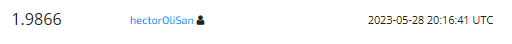

## Conclusiones finales:

El modelo **Fully Connected** obtuvo una puntuación de **3.3351**, y el modelo **CNN utilizando InceptionV3** alcanzó **1.9866**, con el que me encuentro en el puesto número 63. Cabe destacar que el líder actual de la competición cuenta con una puntuación de 0.7476.

A partir de estos resultados, se puede observar que el modelo CNN ha logrado una gran mejora del rendimiento, gracias a la utilización de capas de convolución y la arquitectura InceptionV3, en comparación con el modelo Fully Connected.

Sin embargo, es importante tener en cuenta que aún existe margen de mejora, ya que la puntuación del actual primero se encuentra muy por debajo de los resultados obtenidos con ambos modelos. Por lo que hay aspectos adicionales a considerar, como la optimización de hiperparámetros, o posibles ajustes en la arquitectura del modelo, como la consideración de aumentar el número de épocas, pero en este caso por falta de tiempo, se limito a 20.

## Exportación del modelo:

In [ ]:
# Guarda el modelo en formato h5
model.save('model.h5')

# Creación de la carpeta para los archivos resultantes
!mkdir output

# Conversión del modelo a formato TensorFlow.js
# Y exportarción a la carpeta de salida
!tensorflowjs_converter --input_format keras model.h5 output

# Confirmación de que se hayan generado los archivos en la carpeta de salida
!ls output

group1-shard10of23.bin	group1-shard18of23.bin	group1-shard3of23.bin
group1-shard11of23.bin	group1-shard19of23.bin	group1-shard4of23.bin
group1-shard12of23.bin	group1-shard1of23.bin	group1-shard5of23.bin
group1-shard13of23.bin	group1-shard20of23.bin	group1-shard6of23.bin
group1-shard14of23.bin	group1-shard21of23.bin	group1-shard7of23.bin
group1-shard15of23.bin	group1-shard22of23.bin	group1-shard8of23.bin
group1-shard16of23.bin	group1-shard23of23.bin	group1-shard9of23.bin
group1-shard17of23.bin	group1-shard2of23.bin	model.json


In [ ]:
# Comprime la carpeta en un archivo zip
shutil.make_archive('output', 'zip', 'output')

# Descarga los archivos generados
files.download('output.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejemplo del modelo en producción:

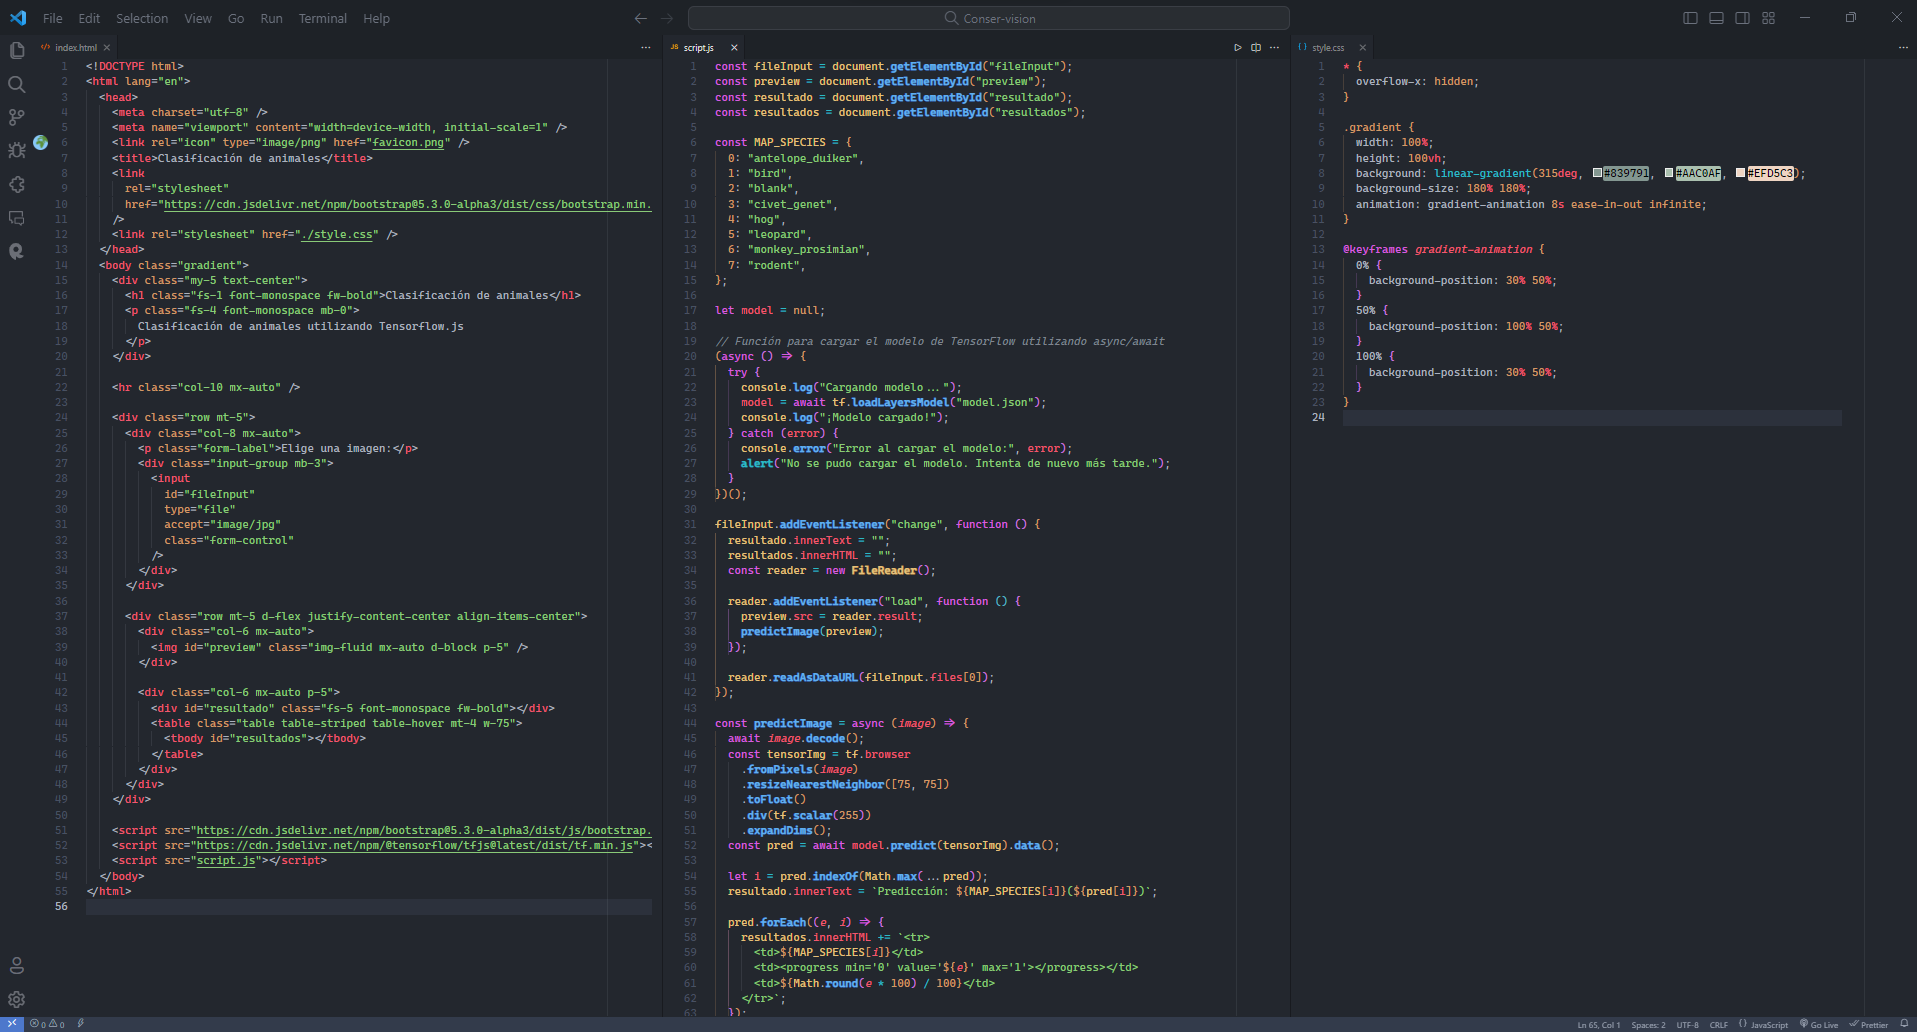

|||
|-|-|
|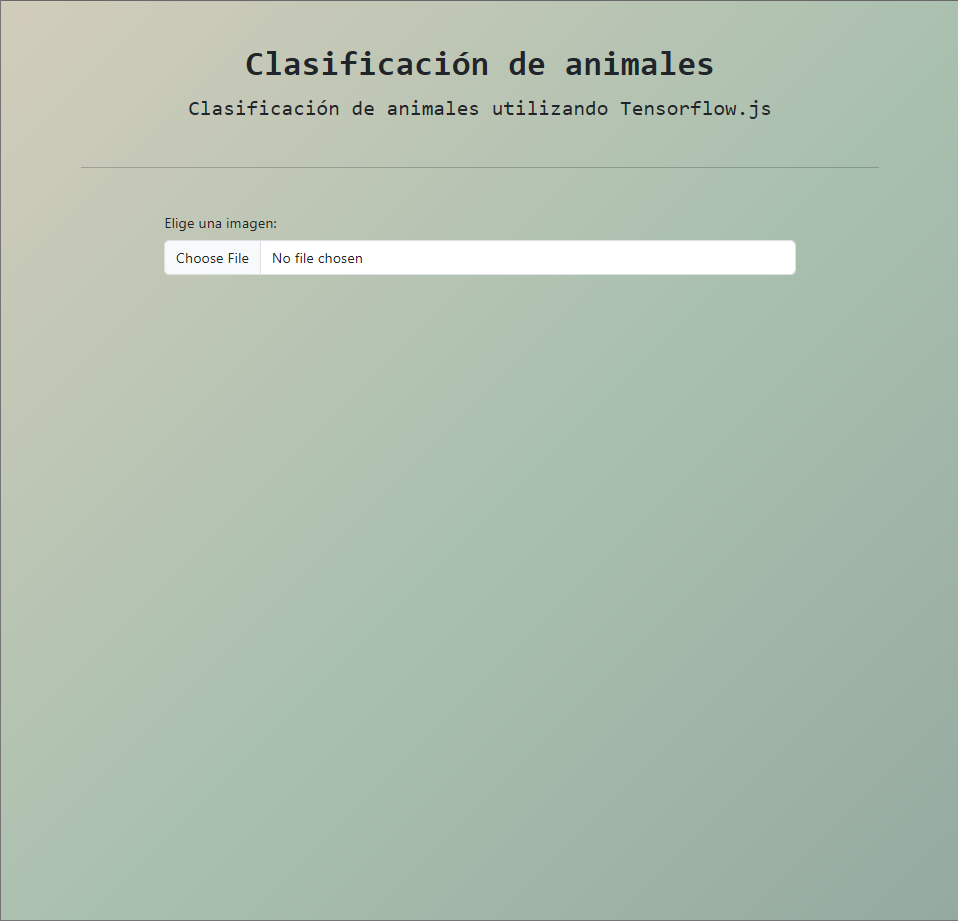|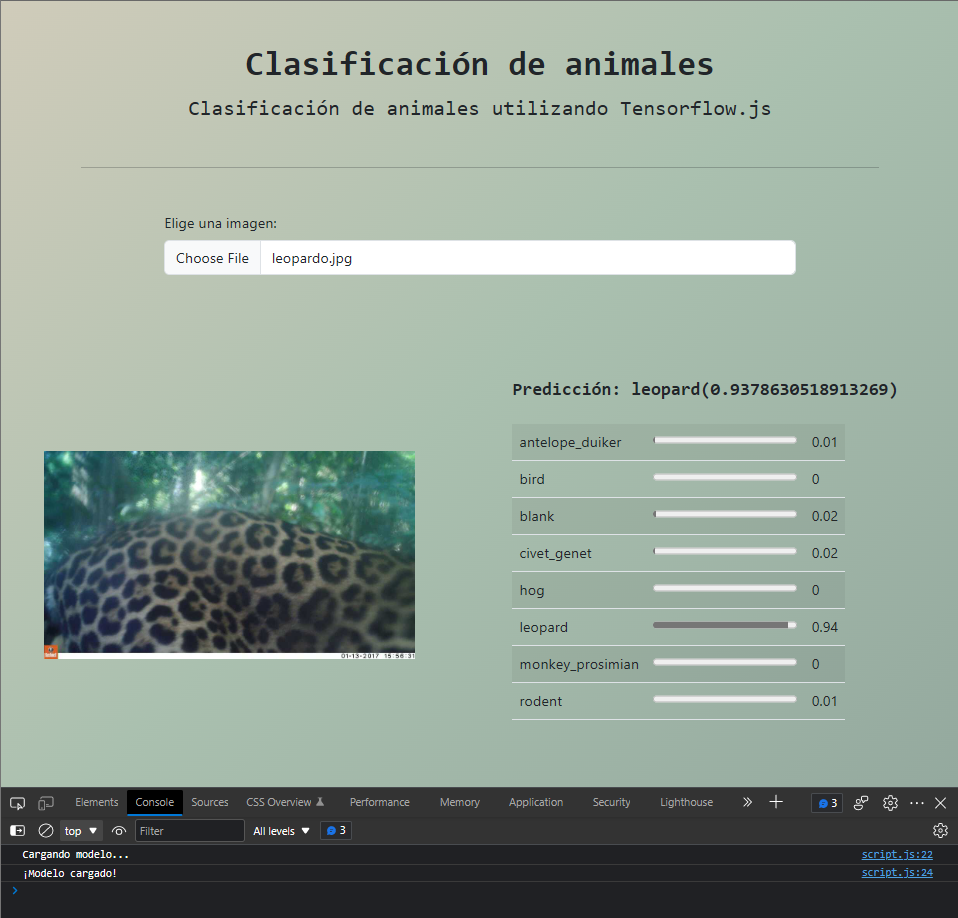|